# Questions to work on

3. Answer business questions
    1. Exploring different product categories:
        1. Create product categories by pattern matching names / descriptions.
        2. Analyse categories in terms of revenue, popularity through time...
    2. Exploring how sales/revenue evolve through time
    3. Detecting different seasonal patterns (holidays, weekend, special days...)
4. Provide a discount strategy
    1. Analyse what has happened when discounts have been given.
        1. Discounts are differences between products.price and orderlines.unit_price
    2. Predict what will happen if more discounts are given

# Importing Data,  and Settings

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
# import cleaned versions of files

# orderlines_cl.csv
url = 'https://drive.google.com/file/d/1lrSr_vVbXN7QSVSScf68DpWwvCMclK5m/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

# orders_cl.csv
url = 'https://drive.google.com/file/d/1cGjJ9o3vtwjK0Sohyr3YVTccXfnTPijT/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

# brands_cl.csv
url = 'https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products_cl.csv
url = 'https://drive.google.com/file/d/1rHC8M-HG13FtVncImXBydgDtIHyCPH0g/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

In [115]:
# do not display the number with scientific notation
pd.options.display.float_format = '{:.2f}'.format

pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_colwidth", 100)

In [116]:
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

# Remove Outliers

In [117]:
# remove outliers on orders. The new csv without outliers is orders2
Q1_or=orders.total_paid.quantile(0.25)#Q1 of revenue
Q3_or=orders.total_paid.quantile(0.75) #Q3 of revenue
IQR_r=Q3_or-Q1_or

                                                          
orders2 =orders.loc[(orders['total_paid'] >= (Q1_or - 1.5*IQR_r))&(orders['total_paid'] <= (Q3_or + 1.5*IQR_r))]

In [118]:
# remove outliers on orderlines. The new data frame without outliers is orderlines2
Q1_r=orderlines.total_price.quantile(0.25)#Q1 of revenue
Q3_r=orderlines.total_price.quantile(0.75) #Q3 of revenue
IQR_r=Q3_r-Q1_r

                                                          
orderlines2 =orderlines.loc[(orderlines['total_price'] >= (Q1_r - 1.5*IQR_r))&(orderlines['total_price'] <= (Q3_r + 1.5*IQR_r))]

# Make Product Categories

In [119]:
# define which products go into the categories

products = products.assign(category ="other")
products.loc[products['name'].str.contains('ipod', regex=True, case=False), "category"] = "ipod"
products.loc[products['name'].str.contains('Hard Drive', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('MacBoook', regex=True, case=False), "category"] = "MacBook"
products.loc[products['name'].str.contains('iMac', regex=True, case=False), "category"] = "Desktop"
products.loc[products['name'].str.contains('Desktop', regex=True, case=False), "category"] = "Desktop"
products.loc[products['name'].str.contains('Iphone', regex=True, case=False), "category"] = "Mobile Phone"
products.loc[products['name'].str.contains('USB', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Case', regex=True, case=False), "category"] = "Mobile Phone Accessories"
products.loc[products['name'].str.contains('Cable', regex=True, case=False), "category"] = "Cable Accessories"
products.loc[products['name'].str.contains('Adapter', regex=True, case=False), "category"] = "Accessories"
products.loc[products['name'].str.contains('Router', regex=True, case=False), "category"] = "WLAN"
products.loc[products['name'].str.contains('Memory', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Ipad', regex=True, case=False), "category"] = "Ipad and Accessories"
products.loc[products['name'].str.contains('Monitor', regex=True, case=False), "category"] = "Monitors"
products.loc[products['name'].str.contains('Core i7', regex=True, case=False), "category"] = "MacBook"
products.loc[products['name'].str.contains('Core i5', regex=True, case=False), "category"] = "MacBook"
products.loc[products['name'].str.contains('UBS Battery', regex=True, case=False), "category"] = "Accesories"
products.loc[products['name'].str.contains('USB-C', regex=True, case=False), "category"] = "Cable Accessories"
products.loc[products['name'].str.contains('monitor activity', regex=True, case=False), "category"] = "Accessories"
products.loc[products['name'].str.contains('Server', regex=True, case=False), "category"] = "Server"
products.loc[products['name'].str.contains('Synology', regex=True, case=False), "category"] = "Server"
products.loc[products['name'].str.contains('games', regex=True, case=False), "category"] = "Accessories"
products.loc[products['name'].str.contains('HDMI', regex=True, case=False), "category"] = "Accessories"
products.loc[products['name'].str.contains('RAM expansion', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Transcend JetDrive Lite', regex=True, case=False), "category"] = "Internal Memory"
products.loc[products['name'].str.contains('Ears Wireless', regex=True, case=False), "category"] = "Sound system"
products.loc[products['name'].str.contains('Adonith Stylus', regex=True, case=False), "category"] = "Ipad and Accessories"
products.loc[products['name'].str.contains('PCI Express SSD', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('TB Network', regex=True, case=False), "category"] = "Network"
products.loc[products['name'].str.contains('Thunderbolt', regex=True, case=False), "category"] = "Cable Accessories"
products.loc[products['name'].str.contains('SSD Pro', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Aura Pro SSD', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Apple MagSafe to MagSafe', regex=True, case=False), "category"] = "Cable Accessories"
products.loc[products['name'].str.contains('Paper Tablet', regex=True, case=False), "category"] = "Tablet"
products.loc[products['name'].str.contains('OWC Aura Pro 6G SSD', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Bose Bluetooth', regex=True, case=False), "category"] = "Sound system"
products.loc[products['name'].str.contains('32TB Seagate IronWolf', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Thin Laptop Hard Disk Seagate', regex=True, case=False), "category"] = "Internal Memory"
products.loc[products['name'].str.contains('expansion kit 2TB SSD', regex=True, case=False), "category"] = "Internal Memory"

products.sample(10)

,sku,name,desc,price,type,max_price_orderlines,category
5500,APP1674,Silicone Case Cover Apple iPhone 7 Plus Cacao,Ultrathin silicone case and microfiber premium for iPhone 7 Plus,45.00,11865403,NaN,Mobile Phone Accessories
8846,SAN0186,SanDisk Ultra 16GB microSDHC Memory Card A1,Micro Memory Card with Adapter reading speed 98MB / s and video speed UHS U1,9.99,57445397,NaN,External Memory
1209,OWC0124,OWC ThunderBay 4 Thunderbolt 2,OWC external storage box 4 bay professional Thunderbolt 2.,580.99,11935397,NaN,Cable Accessories
3891,TUC0255,"Tucano Nido Hard-Shell Case MacBook Pro Retina 13 ""Black",rigid and slicked with rubber feet for MacBook Retina 13 inch casing.,29.90,13835403,NaN,Mobile Phone Accessories
1036,ELG0034,Avea Elgato Smart Bulb,Bluetooth bulb lighting multimode iPhone iPad and iPod Touch App controlled.,39.99,11905404,NaN,other
5307,PAC1511,Pack QNAP TS-251A NAS Server | 8GB RAM | WD 4TB Network,NAS with 8GB RAM and two hard disks 2TB (2x2TB) WD Network for Mac and PC,NaN,12175397,549.99,Network
4533,DLL0041,"Dell P2317H Monitor 23 ""IPS DP 1.2 pivotably",Pivotable Monitor for Mac,231.11,1296,NaN,Monitors
8620,BNQ0053-A,"Open - BenQ PD2710QC Monitor 27 ""QHD Design Professional USB-C",27-inch monitor with 100% sRGB-C USB connection adjustable in height and tiltable through 90 deg...,679.00,1298,NaN,Cable Accessories
8436,AP20254,Like new - Apple iPhone 7 Plus 32GB Rose Gold,Apple iPhone 7 Plus Free Refurbished 32GB Rose Gold Color,779.00,85651716,NaN,Mobile Phone
9414,OTT0165,"Strada OtterBox iPhone Case Skin 7/8 ""Soft Opal"" Beige",Leather Case protection certificate premium for iPhone 7 and iPhone 8,49.99,11865403,NaN,Mobile Phone Accessories


# Explore and Plot Categories

## Impact of all categories on revenue

C:\Users\User\AppData\Local\Temp\ipykernel_17168\1557229075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders2['created_date'] = pd.to_datetime(orders['created_date'])
C:\Users\User\AppData\Local\Temp\ipykernel_17168\1557229075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines2['date'] = pd.to_datetime(orderlines['date'])


<AxesSubplot:xlabel='year_month', ylabel='total_price'>

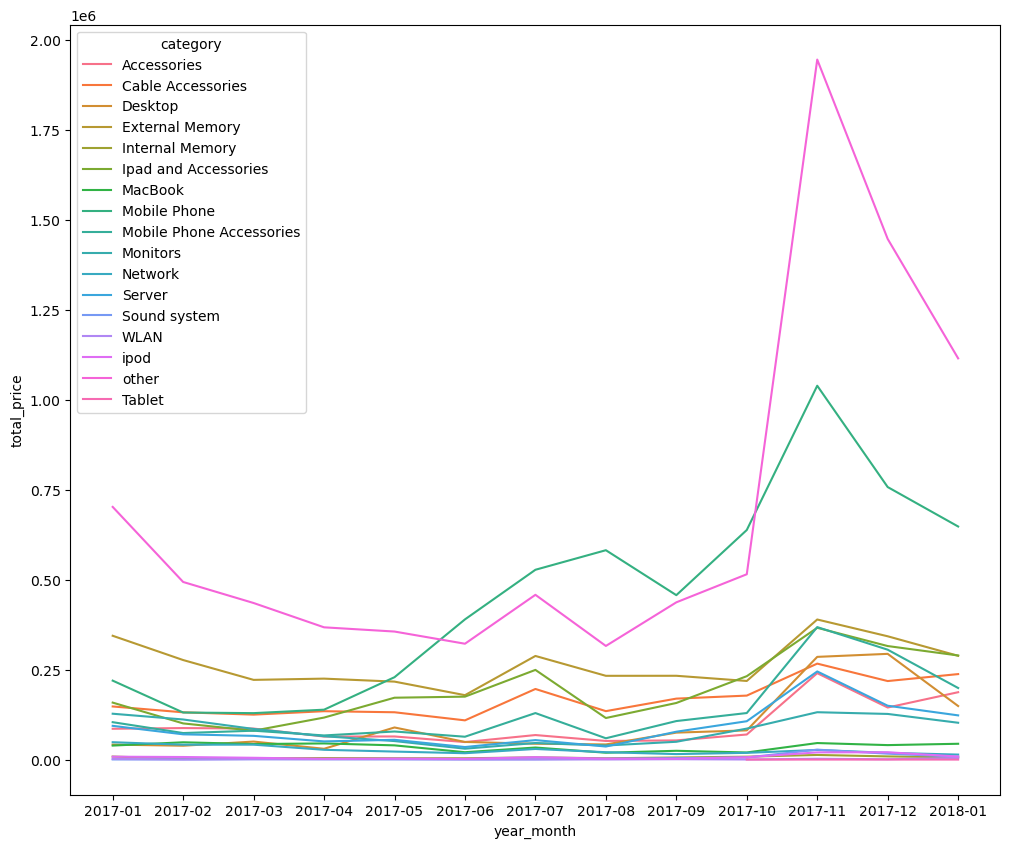

In [120]:
# plot categories and revenue
orders2['created_date'] = pd.to_datetime(orders['created_date'])
orderlines2['date'] = pd.to_datetime(orderlines['date'])

orders_month_revenue=(orderlines2
              .filter(["id_order","sku","unit_price", 'total_price'])
              .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
              .assign(year_month=orderlines2.date.dt.strftime('%Y-%m'))
              .groupby(['year_month', 'category'])
              .agg({'id_order':'count','total_price':'sum'})
              .dropna()
              .reset_index())
plt.subplots(figsize=(12, 10))
sns.lineplot(x= 'year_month', y = 'total_price', data=orders_month_revenue, hue='category')


## Categories unit price and revenue 

<AxesSubplot:xlabel='year_month', ylabel='unit_price'>

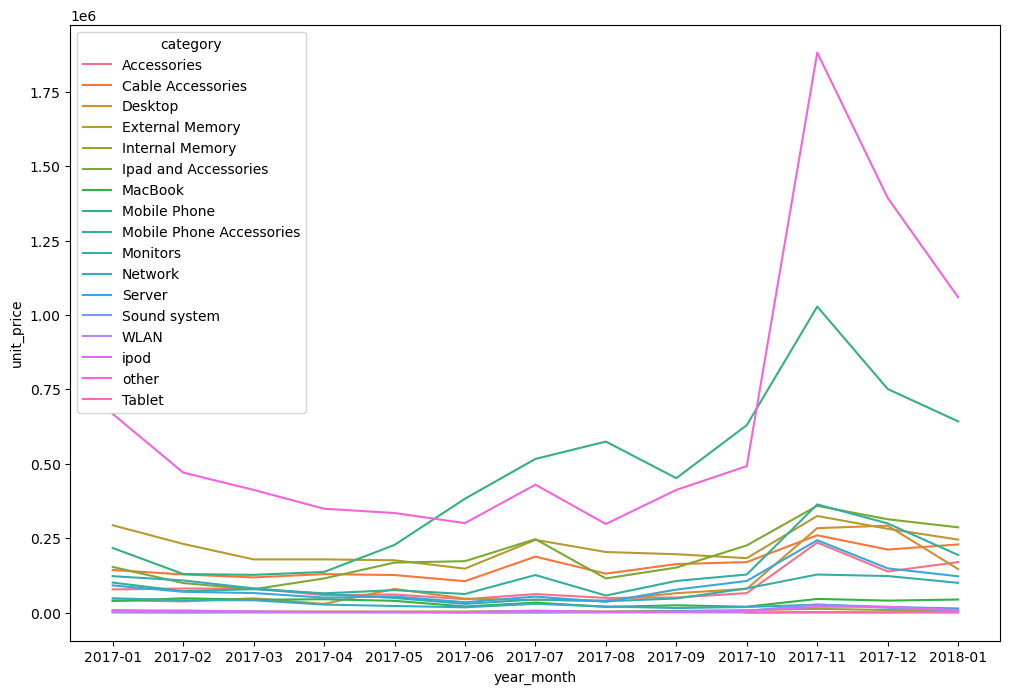

In [121]:
# plot unit price and categories (we are not using this one on the presentation)
import matplotlib.pyplot as plt
import seaborn as sns


orders_month_unit_price=(orderlines2
              .filter(["id_order","sku","unit_price"])
              .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
              .assign(year_month=orderlines2.date.dt.strftime('%Y-%m'))
              .groupby(['year_month', 'category'])
              .agg({'id_order':'count','unit_price':'sum'})
              .dropna()
              .reset_index())
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y = 'unit_price', data=orders_month_unit_price, hue='category')


## Which are top 5 categories

In [122]:
orders_month1=(orderlines2
              .filter(["id_order","sku","unit_price", 'total_price', 'product_quantity'])
              .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
              .assign(year_month_day=orderlines.date.dt.strftime('%Y-%m-%d'))
              .groupby(['category'])
              .agg({'id_order':'count','total_price':'sum', 'product_quantity':'count'})
              .sort_values('total_price', ascending=False)
              .dropna()
              .reset_index())
orders_month1.head(20)

,category,id_order,total_price,product_quantity
0,other,87636,10416132.47,87636
1,Mobile Phone,28722,6928849.71,28722
2,External Memory,33922,4018588.98,33922
3,Ipad and Accessories,15071,2948396.86,15071
4,Cable Accessories,17217,2539039.92,17217
5,Mobile Phone Accessories,28073,2069029.44,28073
6,Desktop,10451,1494147.72,10451
7,Accessories,15142,1461632.64,15142
8,Server,4137,1372371.93,4137
9,Monitors,4291,1204341.03,4291


## Plotting top 5 categories product quantity and revenue

In [123]:
# plot top 5 categories 
orders_month_top5 = (orderlines2
                      .filter(["id_order","sku","unit_price", 'total_price', 'product_quantity'])
                      .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
                      .assign(year_month = orderlines.date.dt.strftime('%Y-%m'))
                      .query('category==["other", "Mobile Phone", "External Memory", "Ipad and Accessories", "Cable Accessories"]')
                      .groupby(['year_month', 'category'])
                      .agg({'total_price':'sum', 'product_quantity':'count'})
                      .dropna()
                      .reset_index())

orders_month_top5.head(10)


,year_month,category,total_price,product_quantity
0,2017-01,Cable Accessories,164952.86,1761
1,2017-01,External Memory,376849.28,4062
2,2017-01,Ipad and Accessories,170591.96,1196
3,2017-01,Mobile Phone,238988.75,1937
4,2017-01,other,764021.51,7198
5,2017-02,Cable Accessories,145266.40,1117
6,2017-02,External Memory,307159.97,2934
7,2017-02,Ipad and Accessories,110288.39,598
8,2017-02,Mobile Phone,143448.16,1109
9,2017-02,other,544125.45,4694


<AxesSubplot:xlabel='year_month', ylabel='product_quantity'>

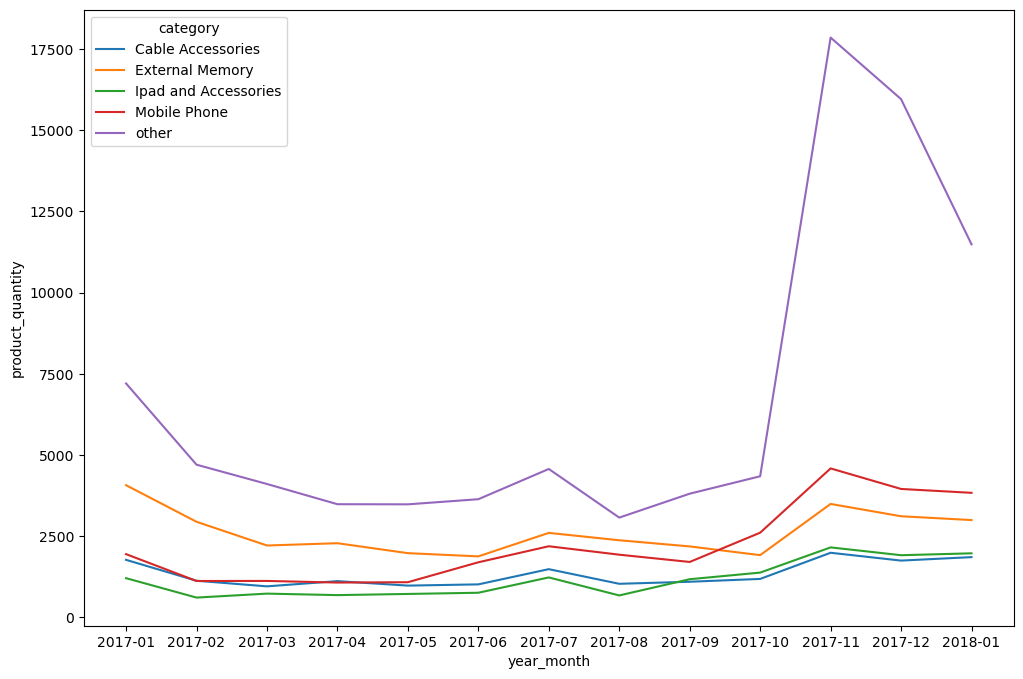

In [124]:
# plot the quantity of products on each category 
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y = 'product_quantity', data=orders_month_top5, hue='category')

<AxesSubplot:xlabel='year_month', ylabel='total_price'>

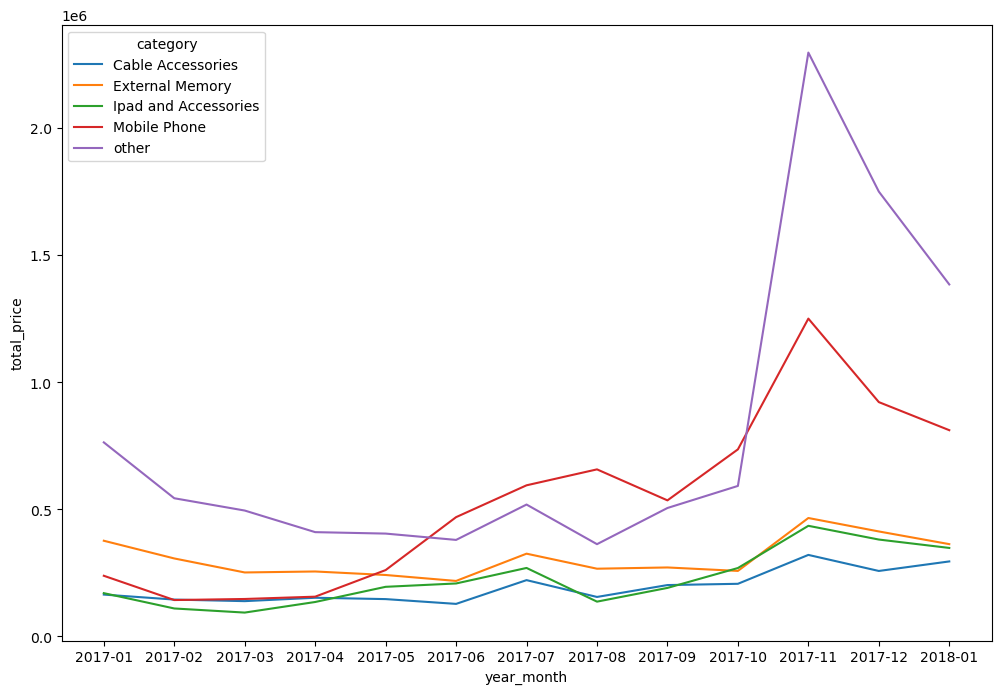

In [125]:
# plot revenue across top 5 categories
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y = 'total_price', data=orders_month_top5, hue='category')

In [126]:
# plot top 5 categories based on mean
orders_month_top5_mean = (orderlines2
                      .filter(["id_order","sku","unit_price", 'total_price', 'product_quantity'])
                      .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
                      .assign(year_month = orderlines2.date.dt.strftime('%Y-%m'))
                      .query('category==["other", "Mobile Phone", "External Memory", "Ipad and Accessories", "Cable Accesories"]')
                      .groupby(['year_month', 'category'])
                      .agg({'total_price':'mean', 'product_quantity':'count'})
                      .dropna()
                      .reset_index()
)

### Plot of categories and mean revenue

<AxesSubplot:xlabel='year_month', ylabel='total_price'>

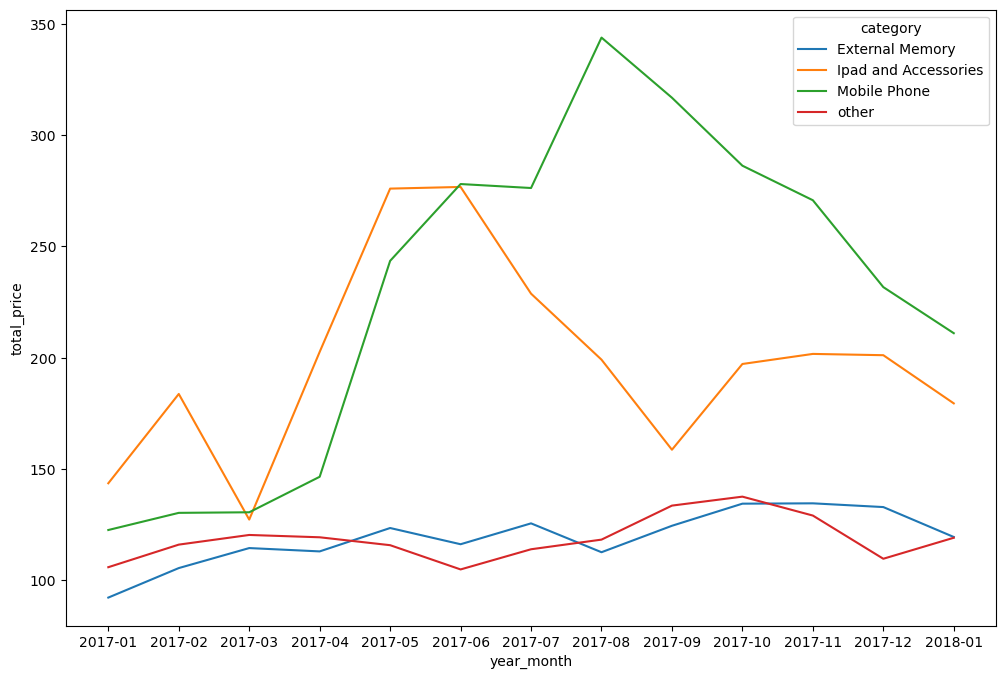

In [127]:
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y = 'total_price', data=orders_month_top5_mean, hue='category')

### Categories sold per year

In [128]:
# plot  number of products on each category sold each year (please consider that year 2018 goes only until march ) 
orders_sold_categories_y = (orderlines2
                      .filter(["id_order","sku","unit_price", 'total_price', 'product_quantity'])
                      .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
                      .assign(year = orderlines.date.dt.strftime('%Y'))
                      .groupby(['year', 'category'])
                      .agg({'product_quantity':'sum'})
                      .dropna()
                      .reset_index()
                      )

orders_sold_categories_y.head(10)

,year,category,product_quantity
0,2017,Accessories,13975
1,2017,Cable Accessories,17229
2,2017,Desktop,9400
3,2017,External Memory,38133
4,2017,Internal Memory,694
5,2017,Ipad and Accessories,13734
6,2017,MacBook,786
7,2017,Mobile Phone,25859
8,2017,Mobile Phone Accessories,25728
9,2017,Monitors,4218


<AxesSubplot:xlabel='year', ylabel='product_quantity'>

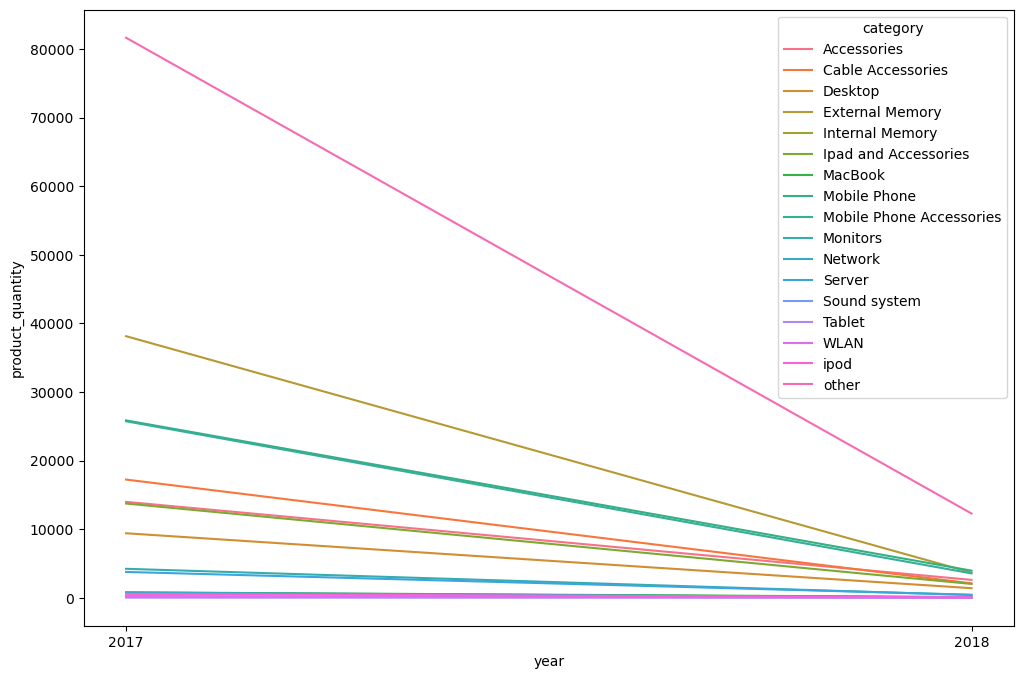

In [129]:
# plot  number of products sold each year (please consider that year 2018 goes only until march )
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year', y = 'product_quantity', data=orders_sold_categories_y, hue='category')

### Categories sold per month

<AxesSubplot:xlabel='month', ylabel='product_quantity'>

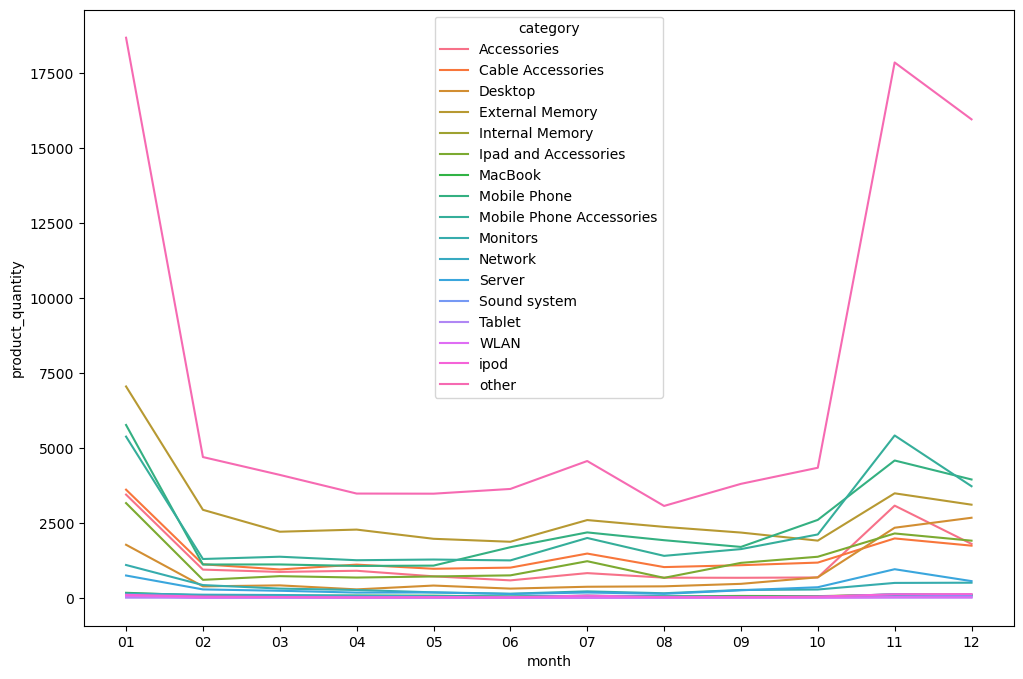

In [130]:
# number of products categories sold each month
orders_sold_categories_m = (orderlines2
                      .filter(["id_order","sku","unit_price", 'total_price', 'product_quantity'])
                      .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
                      .assign(month = orderlines.date.dt.strftime('%m'))
                      .groupby(['month', 'category'])
                      .agg({'product_quantity':'count'})
                      .dropna()
                      .reset_index())

orders_sold_categories_m.head(10)
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'month', y = 'product_quantity', data=orders_sold_categories_m, hue='category')

### Categories and groupsize

In [131]:
# top5 groupsize
orders_top5_groupsize = (orderlines2
                      .filter(["id_order","sku","unit_price", 'total_price', 'product_quantity'])
                      .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
                      .assign(year_month = orderlines.date.dt.strftime('%Y-%m'))
                      .query('category==["other", "Mobile Phone", "External Memory", "Ipad and Accessories", "Cable Accesories"]')
                      .groupby(['year_month', 'category'])
                      .agg({'total_price':'sum', 'id_order':'count'})
                      .dropna()
                      .reset_index()
                      .assign(revenue_groupsize = lambda x: x["total_price"] / x["id_order"])
                      )

<AxesSubplot:xlabel='year_month', ylabel='revenue_groupsize'>

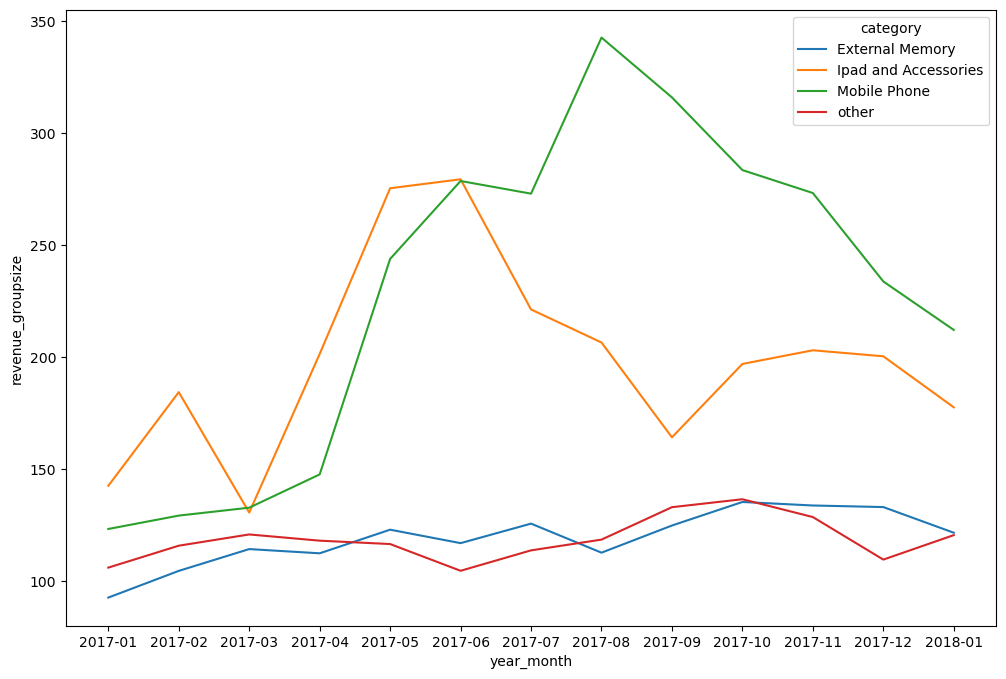

In [132]:
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y = 'revenue_groupsize', data=orders_top5_groupsize, hue='category')

# Create Discounts Columns in Orderlines:

In [133]:
discounts = (
orderlines
.filter(["id_order","sku","unit_price", "date", "total_price"])
.merge(products.filter(["sku","desc", "price"]), on="sku", how="left")
.assign(disc = lambda x: x["price"] - x["unit_price"])
.assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["price"])) * 100 ) 
.assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
.copy()
)
discounts

,id_order,sku,unit_price,date,total_price,desc,price,disc,disc_perc,year_month
0,299539,OTT0133,18.99,2017-01-01 00:07:19,18.99,resistant cover and thin beveled edges for iPhone SE / 5s / 5,34.99,16.00,45.73,2017-01
1,299540,LGE0043,399.00,2017-01-01 00:19:45,399.00,Monitor for gamers and multimedia professional use with two HDMI ports for Mac and PC,429.00,30.00,6.99,2017-01
2,299541,PAR0071,474.05,2017-01-01 00:20:57,474.05,cuadricóptero wireless remote control with 25 minutes of autonomous control FLYPAD and FPV Glass...,699.00,224.95,32.18,2017-01
3,299542,WDT0315,68.39,2017-01-01 00:51:40,68.39,Internal Hard Drive Western Digital 2TB 3.5-inch SATA 6Gb / s for Mac and PC users.,79.00,10.61,13.43,2017-01
4,299543,JBL0104,23.74,2017-01-01 01:06:38,23.74,Compact Bluetooth Handsfree for iPhone iPad and iPod speaker.,29.90,6.16,20.60,2017-01
...,...,...,...,...,...,...,...,...,...,...
293738,527398,JBL0122,42.99,2018-03-14 13:57:25,42.99,Wireless headphones with folding design with 11 hours of battery life and built-in microphone fo...,49.95,6.96,13.93,2018-03
293739,527399,PAC0653,141.58,2018-03-14 13:57:34,141.58,"SSD upgrade kit 2008-2010 250 GB MacBook and MacBook Pro Tools 2009-2012,",215.98,74.40,34.45,2018-03
293740,527400,APP0698,9.99,2018-03-14 13:57:41,19.98,Apple Lightning USB Cable 1 meter to charge and sync iPhone iPad and iPod,25.00,15.01,60.04,2018-03
293741,527388,BEZ0204,19.99,2018-03-14 13:58:01,19.99,Macbook thin sheath 12 inches.,29.99,10.00,33.34,2018-03


In [134]:
# create table with total prices grouped first by year-month
discount_agg_year_month_sum = (
orderlines2
    .filter(["id_order","sku","unit_price", 'date', 'total_price'])
    .merge(products.filter(["sku","desc", "price"]), on="sku", how="left")
    .assign(disc = lambda x: x["price"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["price"])) * 100 ) 
    .assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
    .dropna()
    .groupby(['year_month', 'unit_price', 'disc', 'disc_perc'])
    .agg({'total_price':'sum'})
    .reset_index()
) 
discount_agg_year_month_sum

,year_month,unit_price,disc,disc_perc,total_price
0,2017-01,1.28,5.71,81.69,1.28
1,2017-01,2.31,7.68,76.88,2.31
2,2017-01,2.54,4.45,63.66,2.54
3,2017-01,2.69,4.30,61.52,2.69
4,2017-01,2.84,4.15,59.37,2.84
...,...,...,...,...,...
36012,2018-01,829.00,161.33,16.29,7461.00
36013,2018-01,829.00,306.59,27.00,4145.00
36014,2018-01,829.00,446.59,35.01,829.00
36015,2018-01,834.37,156.62,15.80,1668.74


In [135]:
discount_agg_year_month_mean = (
orderlines2
    .filter(["id_order","sku","unit_price", 'date', 'total_price'])
    .merge(products.filter(["sku","desc", "price"]), on="sku", how="left")
    .assign(disc = lambda x: x["price"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["price"])) * 100 )
    .assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
    .dropna()
    .groupby(['year_month', 'unit_price', 'disc', 'disc_perc'])
    .agg({'total_price':'mean'})
    .reset_index()
) 

discount_agg_year_month_mean

,year_month,unit_price,disc,disc_perc,total_price
0,2017-01,1.28,5.71,81.69,1.28
1,2017-01,2.31,7.68,76.88,2.31
2,2017-01,2.54,4.45,63.66,2.54
3,2017-01,2.69,4.30,61.52,2.69
4,2017-01,2.84,4.15,59.37,2.84
...,...,...,...,...,...
36012,2018-01,829.00,161.33,16.29,829.00
36013,2018-01,829.00,306.59,27.00,829.00
36014,2018-01,829.00,446.59,35.01,829.00
36015,2018-01,834.37,156.62,15.80,834.37


# Analyse Discounts

In [136]:
# define filter to make discount categories: 
def filter(x):
    if x == 0: 
      return "no discount"
    if (x > 0 and x <= 20):
        return '<=20%'
    if (x > 20 and x <= 40):
        return '21% - 40%'
    if (x > 40 and x <= 60):
        return '41% - 60%'
    if (x > 60 and x <= 80):
      return '61% - 80%'
    if(x > 80 and x <= 100):
      return '81% - 100%'

# apply the categories on the generated discount datasets: 

discount_agg_year_month_sum['discount_category'] = discount_agg_year_month_sum['disc_perc'].apply(filter).sort_values()
discount_agg_year_month_mean['discount_category'] = discount_agg_year_month_mean['disc_perc'].apply(filter).sort_values()
discounts['discount_category'] = discounts['disc_perc'].apply(filter).sort_values()
discount_agg_year_month_mean.rename(columns={
    'total_price': 'average_price'},
    inplace=True)

In [137]:
discount_agg_year_month_mean

,year_month,unit_price,disc,disc_perc,average_price,discount_category
0,2017-01,1.28,5.71,81.69,1.28,81% - 100%
1,2017-01,2.31,7.68,76.88,2.31,61% - 80%
2,2017-01,2.54,4.45,63.66,2.54,61% - 80%
3,2017-01,2.69,4.30,61.52,2.69,61% - 80%
4,2017-01,2.84,4.15,59.37,2.84,41% - 60%
...,...,...,...,...,...,...
36012,2018-01,829.00,161.33,16.29,829.00,<=20%
36013,2018-01,829.00,306.59,27.00,829.00,21% - 40%
36014,2018-01,829.00,446.59,35.01,829.00,21% - 40%
36015,2018-01,834.37,156.62,15.80,834.37,<=20%


In [138]:
# check if there are any orders within discount category 61 - 80 %
#discount_agg_year_month_sum.loc[discount_agg_year_month_sum['discount_category'] == '61% - 80%', :]

(0.0, 400.0)

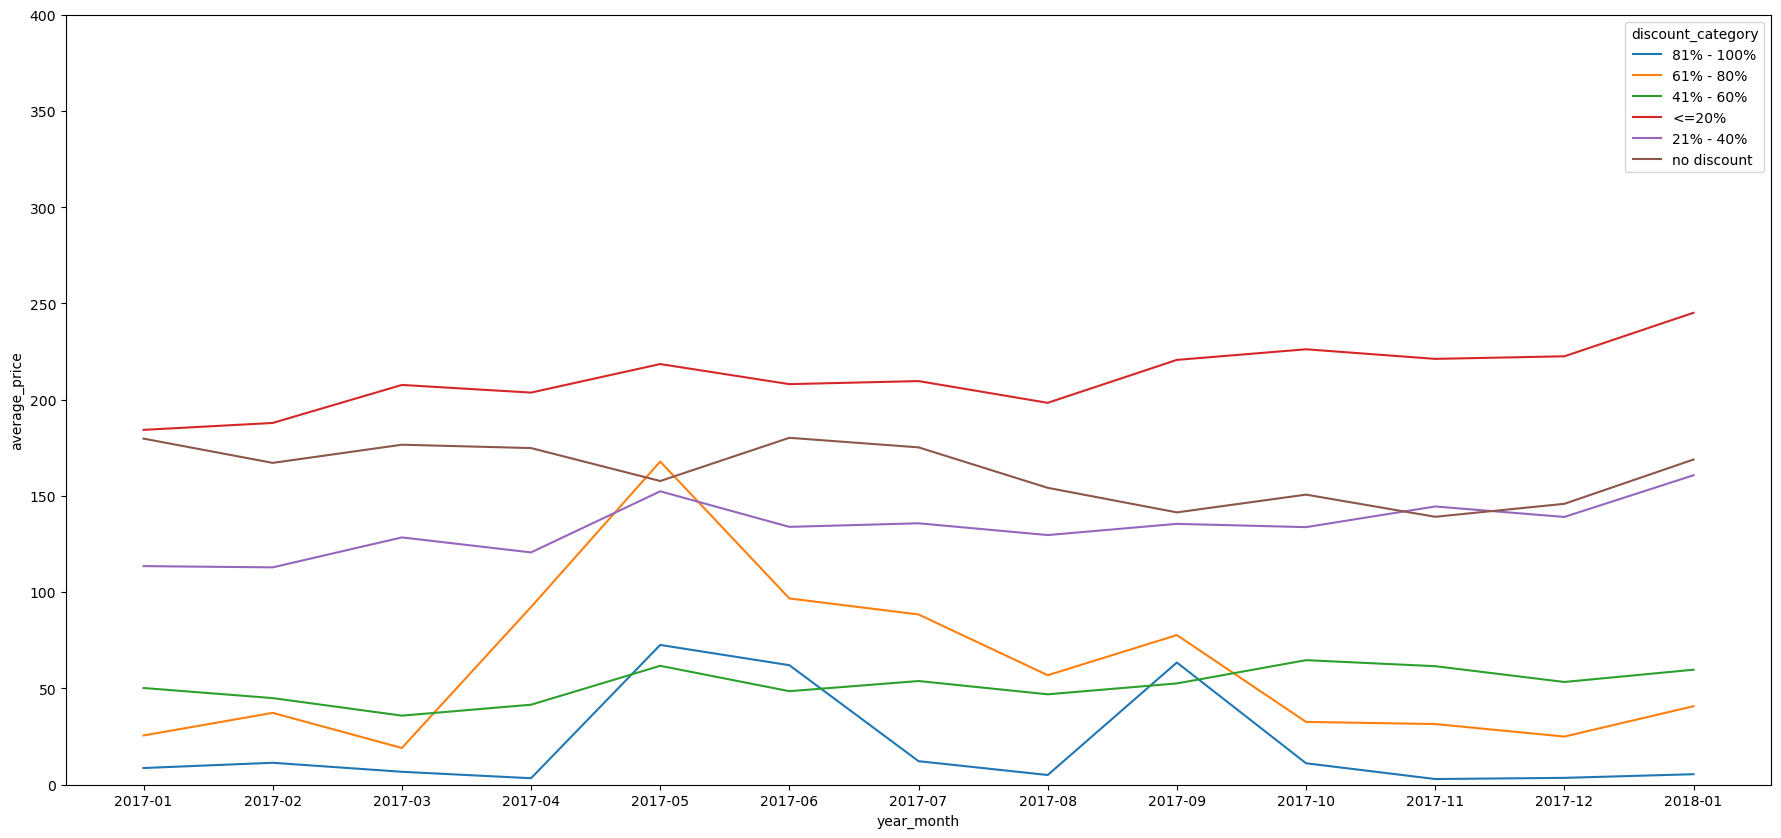

In [139]:
plt.subplots(figsize=(22, 10))
sns.lineplot(x= 'year_month', y ='average_price', hue='discount_category', ci=None, data=discount_agg_year_month_mean)
plt.ylim(0, 400)

<AxesSubplot:xlabel='year_month', ylabel='disc_perc'>

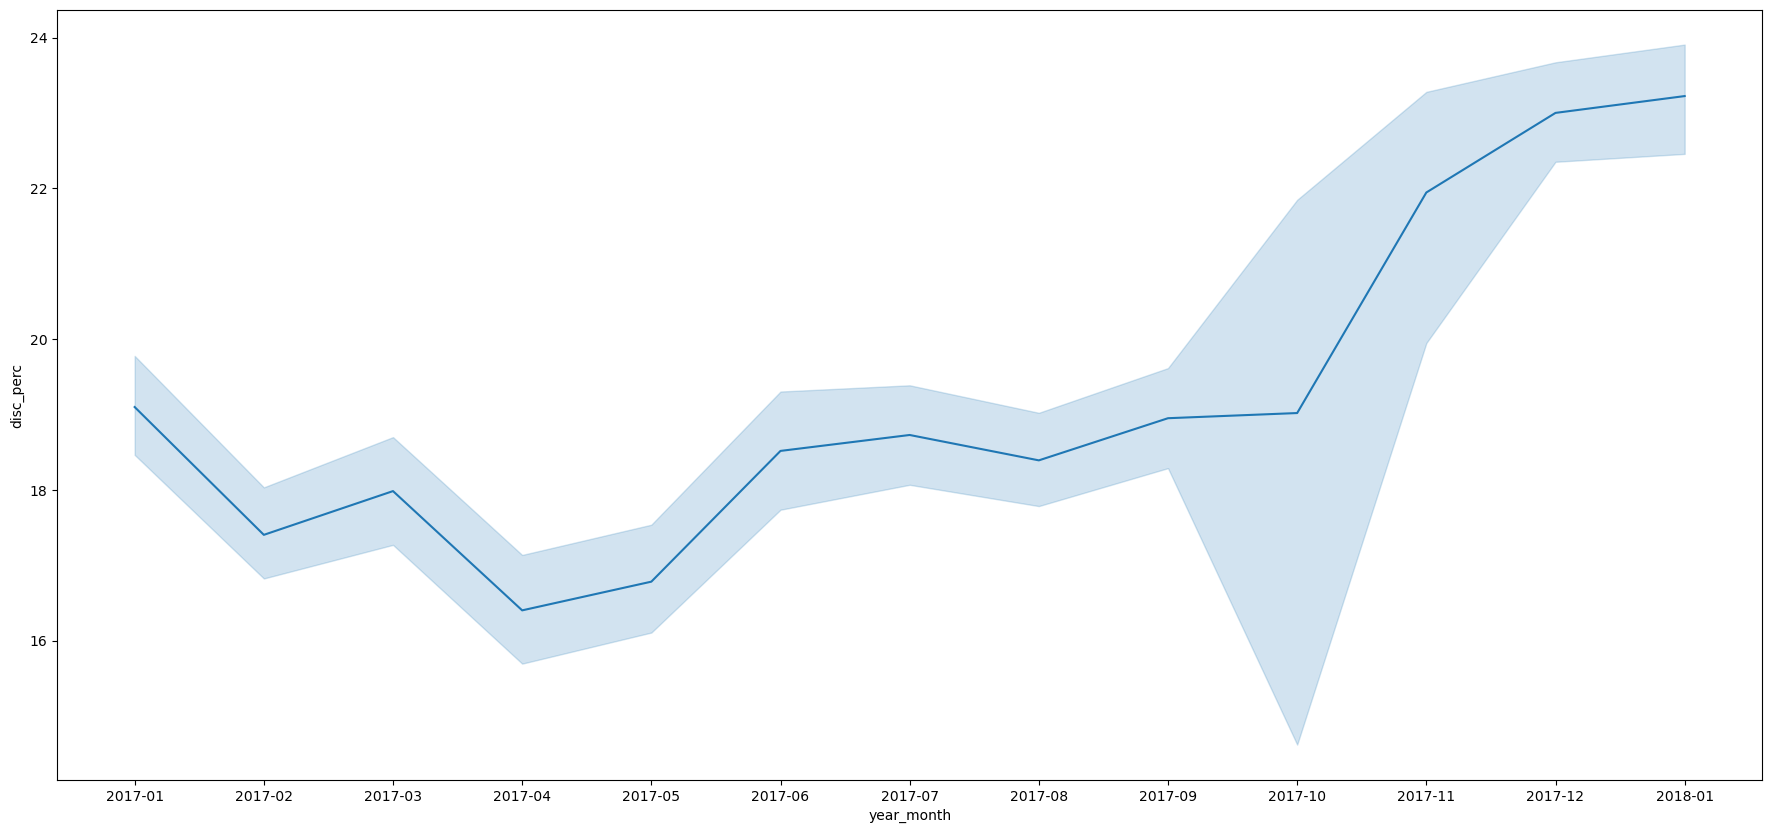

In [140]:
plt.subplots(figsize=(22, 10))
sns.lineplot(x='year_month', y ='disc_perc', data=discount_agg_year_month_sum)

In [141]:
#do not delete
top_products =  (
orderlines2
.filter(["id_order","sku","unit_price", "date", "total_price"])
.merge(products.filter(['name', "sku","desc", "price"]), on="sku", how="left")
.assign(disc = lambda x: x["price"] - x["unit_price"])
.assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["price"])) * 100 ) 
.assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
.copy()
.groupby(['year_month', 'sku', 'name', 'desc', 'disc'])
.agg({'total_price':'sum'})
.sort_values(by='total_price', ascending = False)
.reset_index()
            )
    
top_products['discount_status'] = top_products.apply(lambda row: False if row['disc'] == 0 else True, axis = 1)
top_products.head(100)

,year_month,sku,name,desc,disc,total_price,discount_status
0,2017-12,APP1216,Apple Magic Trackpad 2,Apple Wireless Bluetooth Trackpad.,19.00,308230.00,True
1,2017-11,APP1216,Apple Magic Trackpad 2,Apple Wireless Bluetooth Trackpad.,19.00,268060.00,True
2,2017-12,APP0662,IMac AppleCare Protection Plan,Apple Care extended warranty for iMac.,41.00,244950.00,True
3,2017-12,MIC0036,Office 365 Personal 1 license 1 M ± or,Personal license with subscription of 365 days of Office for Mac users and PC home and students,4.91,168974.00,True
4,2017-11,APP0662,IMac AppleCare Protection Plan,Apple Care extended warranty for iMac.,14.01,165154.99,True
5,2018-01,APP0663,"AppleCare Protection Plan MacBook / Air / Pro 13 """,Apple Care extended warranty Macbook Air / Macbook / Macbook Pro 13-inch.,30.00,162498.00,True
6,2017-11,MIC0036,Office 365 Personal 1 license 1 M ± or,Personal license with subscription of 365 days of Office for Mac users and PC home and students,-0.09,152578.20,True
7,2017-11,APP0663,"AppleCare Protection Plan MacBook / Air / Pro 13 """,Apple Care extended warranty Macbook Air / Macbook / Macbook Pro 13-inch.,19.01,148343.55,True
8,2017-11,APP0663,"AppleCare Protection Plan MacBook / Air / Pro 13 """,Apple Care extended warranty Macbook Air / Macbook / Macbook Pro 13-inch.,50.00,133927.00,True
9,2017-11,APP0666,AppleCare Protection MacBook Pro 15,Apple Care extended warranty MacBook Pro 15-inch and 15-inch MacBook Pro Retina,29.01,108476.61,True


In [142]:
products_top_sku = top_products.query('sku==["APP2479"]')
products_top_sku.groupby('year_month')

<AxesSubplot:xlabel='year_month', ylabel='total_price'>

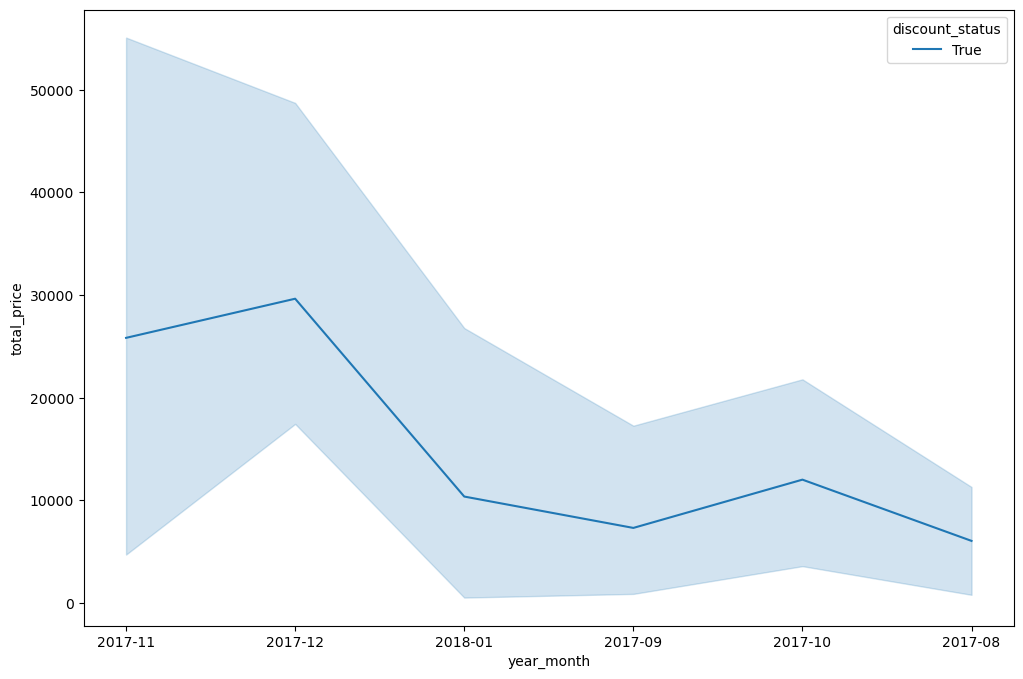

In [143]:
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y ='total_price', data=products_top_sku, hue='discount_status')

# Exploring Revenue over time

ValueError: Could not interpret value `order_id` for parameter `y`

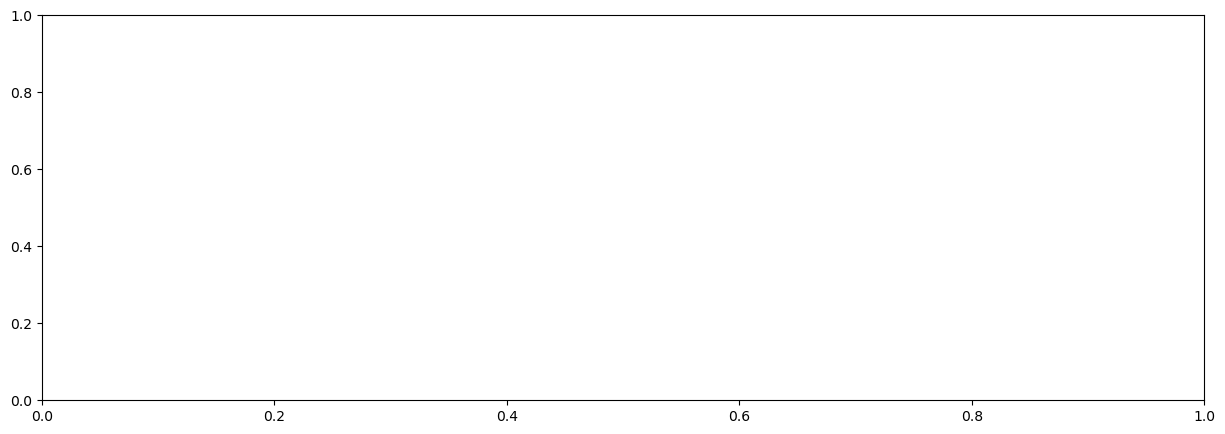

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
#orders.query('state == "Completed"')
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

#discounts.assign(no_discount = lambda x: True if x['disc'] == 0)

#orders_month=(orders
 #             .assign(year_month=orders.created_date.dt.strftime('%Y-%m'))
  #            .query('state=="Completed"')
   #           .groupby('year_month')
    #          .agg({'order_id':'count','total_paid':'sum'})
     #         .reset_index())
#orders_month.head(10)
plt.subplots(figsize=(15,5))
#sns.barplot(data=orders_month,x='month',y='order_id',hue='state',palette='colorblind')
p=sns.lineplot(data=discounts, x='year_month',y='order_id',palette='colorblind')
p.axhline(
    orders_month['order_id'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('Time') 
plt.ylabel('Order Numbers') 
plt.title('How sales evolution through 2017 and 2018') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

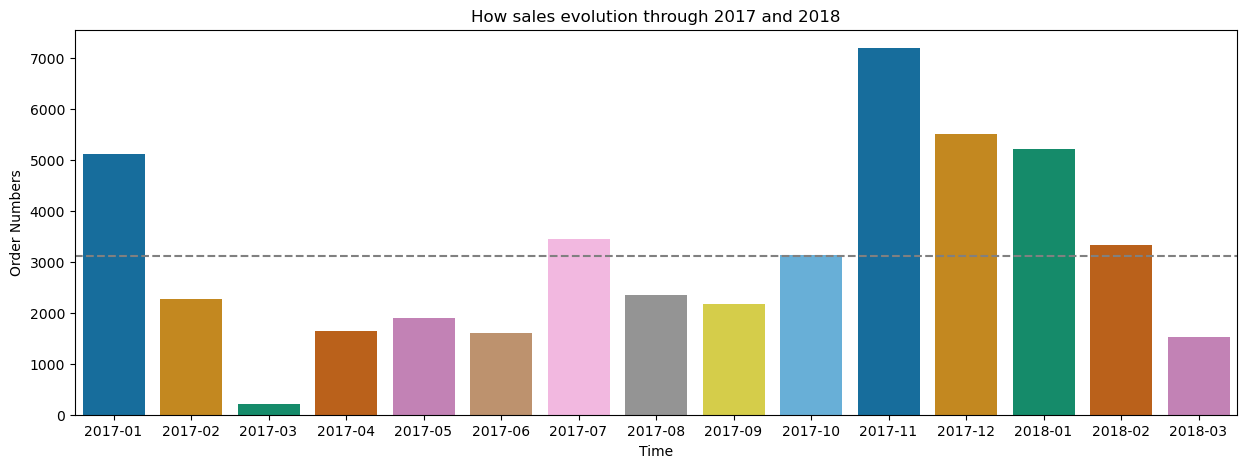

In [147]:
#qeustion No 2--#Exploring how sales/revenue evolve through time

import matplotlib.pyplot as plt
import seaborn as sns
#orders.query('state == "Completed"')
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

orders_month=(orders
              .assign(year_month=orders.created_date.dt.strftime('%Y-%m'))
              .query('state=="Completed"')
              .groupby('year_month')
              .agg({'order_id':'count','total_paid':'sum'})
              .reset_index())
#orders_month.head(10)
plt.subplots(figsize=(15,5))
#sns.barplot(data=orders_month,x='month',y='order_id',hue='state',palette='colorblind')
p=sns.barplot(data=orders_month,x='year_month',y='order_id',palette='colorblind')
p.axhline(
    orders_month['order_id'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('Time') 
plt.ylabel('Order Numbers') 
plt.title('How sales evolution through 2017 and 2018') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

## Revenue over time plot used in presentation

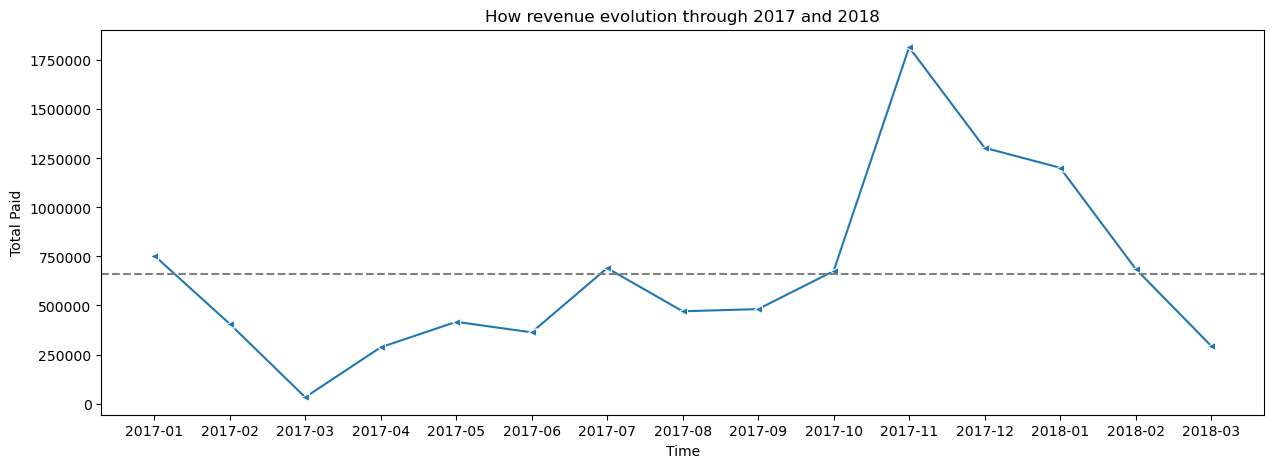

In [148]:
orders_month=(orders2
              .assign(year_month=orders.created_date.dt.strftime('%Y-%m'))
              .query('state=="Completed"')
              .groupby('year_month')
              .agg({'total_paid':'sum'})
              .reset_index())

plt.subplots(figsize=(15,5))

#p=sns.barplot(data=orders_month,x='year_month',y='total_paid',palette='colorblind')
p=sns.lineplot(data=orders_month,x='year_month',y='total_paid',marker='<')


p.axhline(
    orders_month['total_paid'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('Time') 
plt.ylabel('Total Paid') 
plt.title('How revenue evolution through 2017 and 2018') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()


## Revenue evolution in days

In [149]:
orders_new1 = orders2.assign(year = orders2['created_date'].dt.strftime('%Y'), 
           month = orders['created_date'].dt.strftime('%b'),
           day = orders['created_date'].dt.strftime('%A'))
orders_new1

,order_id,created_date,total_paid,state,check_orders,year,month,day
0,241319,2017-01-02 13:35:40,44.99,Cancelled,True,2017,Jan,Monday
1,241423,2017-11-06 13:10:02,136.15,Completed,True,2017,Nov,Monday
2,242832,2017-12-31 17:40:03,15.76,Completed,True,2017,Dec,Sunday
3,243330,2017-02-16 10:59:38,84.98,Completed,True,2017,Feb,Thursday
4,243784,2017-11-24 13:35:19,157.86,Cancelled,True,2017,Nov,Friday
...,...,...,...,...,...,...,...,...
204686,527397,2018-03-14 13:56:38,42.99,Place Order,True,2018,Mar,Wednesday
204687,527398,2018-03-14 13:57:25,42.99,Shopping Basket,True,2018,Mar,Wednesday
204688,527399,2018-03-14 13:57:34,141.58,Shopping Basket,True,2018,Mar,Wednesday
204689,527400,2018-03-14 13:57:41,19.98,Shopping Basket,True,2018,Mar,Wednesday


In [150]:
orders_new = (orders2.assign(year = orders2['created_date'].dt.strftime('%Y'), 
           month = orders2['created_date'].dt.strftime('%b'),
           day = orders2['created_date'].dt.strftime('%A'))
           .groupby(['year','month', 'day'])
    .agg({'total_paid':'sum'})
    .reset_index()
)
orders_new

,year,month,day,total_paid
0,2017,Apr,Friday,257093.56
1,2017,Apr,Monday,335554.56
2,2017,Apr,Saturday,221144.19
3,2017,Apr,Sunday,241414.92
4,2017,Apr,Thursday,237940.15
5,2017,Apr,Tuesday,369888.66
6,2017,Apr,Wednesday,279326.14
7,2017,Aug,Friday,237492.98
8,2017,Aug,Monday,316619.35
9,2017,Aug,Saturday,176650.37


### Query only completed orders

In [151]:
orders_compl = orders2.query('state == "Completed"')
orders_compl

,order_id,created_date,total_paid,state,check_orders
1,241423,2017-11-06 13:10:02,136.15,Completed,True
2,242832,2017-12-31 17:40:03,15.76,Completed,True
3,243330,2017-02-16 10:59:38,84.98,Completed,True
5,245275,2017-06-28 11:35:37,149.00,Completed,True
6,245595,2017-01-21 12:52:47,112.97,Completed,True
...,...,...,...,...,...
204403,527042,2018-03-14 11:47:50,18.98,Completed,True
204423,527070,2018-03-14 11:50:48,24.97,Completed,True
204426,527074,2018-03-14 11:51:42,24.97,Completed,True
204444,527096,2018-03-14 11:58:40,34.96,Completed,True


In [152]:
orders_new = orders_compl.assign(year = orders['created_date'].dt.strftime('%Y'), 
           month = orders_compl['created_date'].dt.strftime('%b'),
           day = orders_compl['created_date'].dt.strftime('%A'))
orders_new

,order_id,created_date,total_paid,state,check_orders,year,month,day
1,241423,2017-11-06 13:10:02,136.15,Completed,True,2017,Nov,Monday
2,242832,2017-12-31 17:40:03,15.76,Completed,True,2017,Dec,Sunday
3,243330,2017-02-16 10:59:38,84.98,Completed,True,2017,Feb,Thursday
5,245275,2017-06-28 11:35:37,149.00,Completed,True,2017,Jun,Wednesday
6,245595,2017-01-21 12:52:47,112.97,Completed,True,2017,Jan,Saturday
...,...,...,...,...,...,...,...,...
204403,527042,2018-03-14 11:47:50,18.98,Completed,True,2018,Mar,Wednesday
204423,527070,2018-03-14 11:50:48,24.97,Completed,True,2018,Mar,Wednesday
204426,527074,2018-03-14 11:51:42,24.97,Completed,True,2018,Mar,Wednesday
204444,527096,2018-03-14 11:58:40,34.96,Completed,True,2018,Mar,Wednesday


### Only months with most revenue (before taking out outliers)

In [153]:

orders_new = (orders.assign(year = orders['created_date'].dt.strftime('%Y'), 
           month = orders['created_date'].dt.strftime('%b'),
           day = orders['created_date'].dt.strftime('%A'))
.query('month==["Jan","Nov","Dec","Jul"]')
           .groupby(['year','month', 'day'])
    .agg({'total_paid':'sum'})
    
    .reset_index()
)
orders_new.head()

,year,month,day,total_paid
0,2017,Dec,Friday,2215665.95
1,2017,Dec,Monday,2272915.48
2,2017,Dec,Saturday,2674716.76
3,2017,Dec,Sunday,2473026.08
4,2017,Dec,Thursday,2755419.05


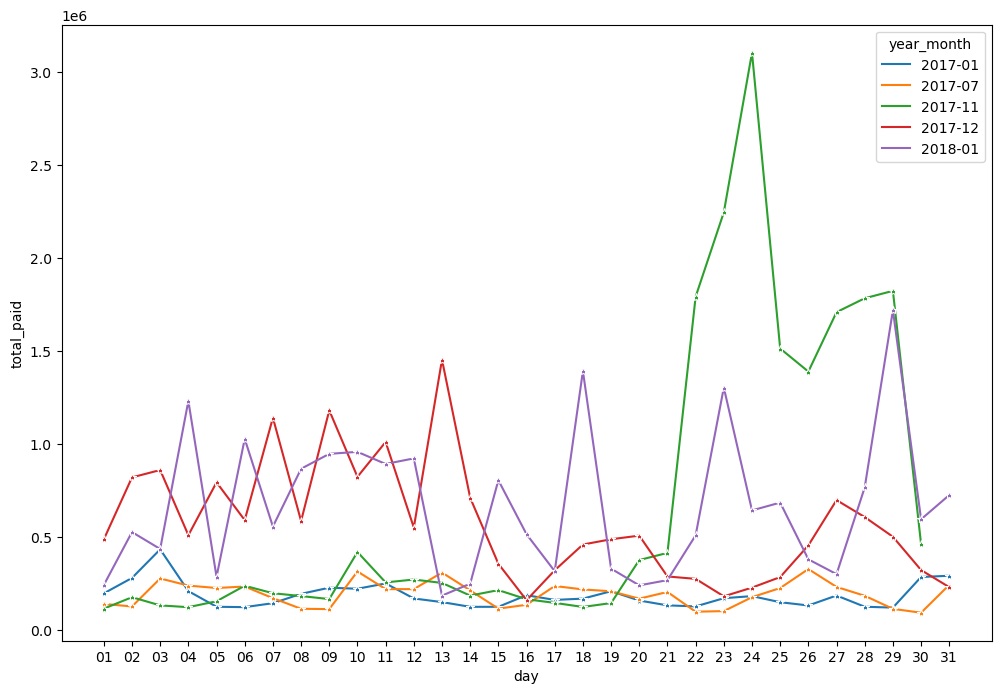

In [154]:
orders_new = (orders.assign(
           year_month = orders['created_date'].dt.strftime('%Y-%m'),
           day = orders['created_date'].dt.strftime('%d'))
.query('year_month==["2017-01","2017-07","2017-11","2017-12","2018-01"]')
           .groupby(['year_month','day'])
    .agg({'total_paid':'sum'})
    
    .reset_index()
)

orders_new.head(10)
plt.subplots(figsize=(12, 8))

p=sns.lineplot(
    data= orders_new,
    x='day', 
    y='total_paid', 
    hue='year_month',marker='*')  
#orders_new.loc[orders_new.year_month=='2017-11']

24-11-2017---(total paid 3106027.82) Black Fri. Sale (the sales baginn 2 days from Black Fri.)

27-11-2017-   Cyber day sale(continue 2 days)

12.2017 Chrismas Sales( gift buying for Chrismas)

01.2017/01.2018 January Sale, sales held after Chris. to encourage customers back to the shops



In [155]:
orders_new_2= (orders_compl.assign(year =   orders['created_date'].dt.strftime('%Y'), 
           month =   orders['created_date'].dt.strftime('%b'),
           day =   orders['created_date'].dt.strftime('%A'))
           .query('month==["Nov","Dec", "Jan", "Jul"]')
           .groupby(['year','month','day'])
            .agg({'total_paid':'sum'})
            .reset_index()
)

### Plot of days of the week and top revenue months (before outliers)

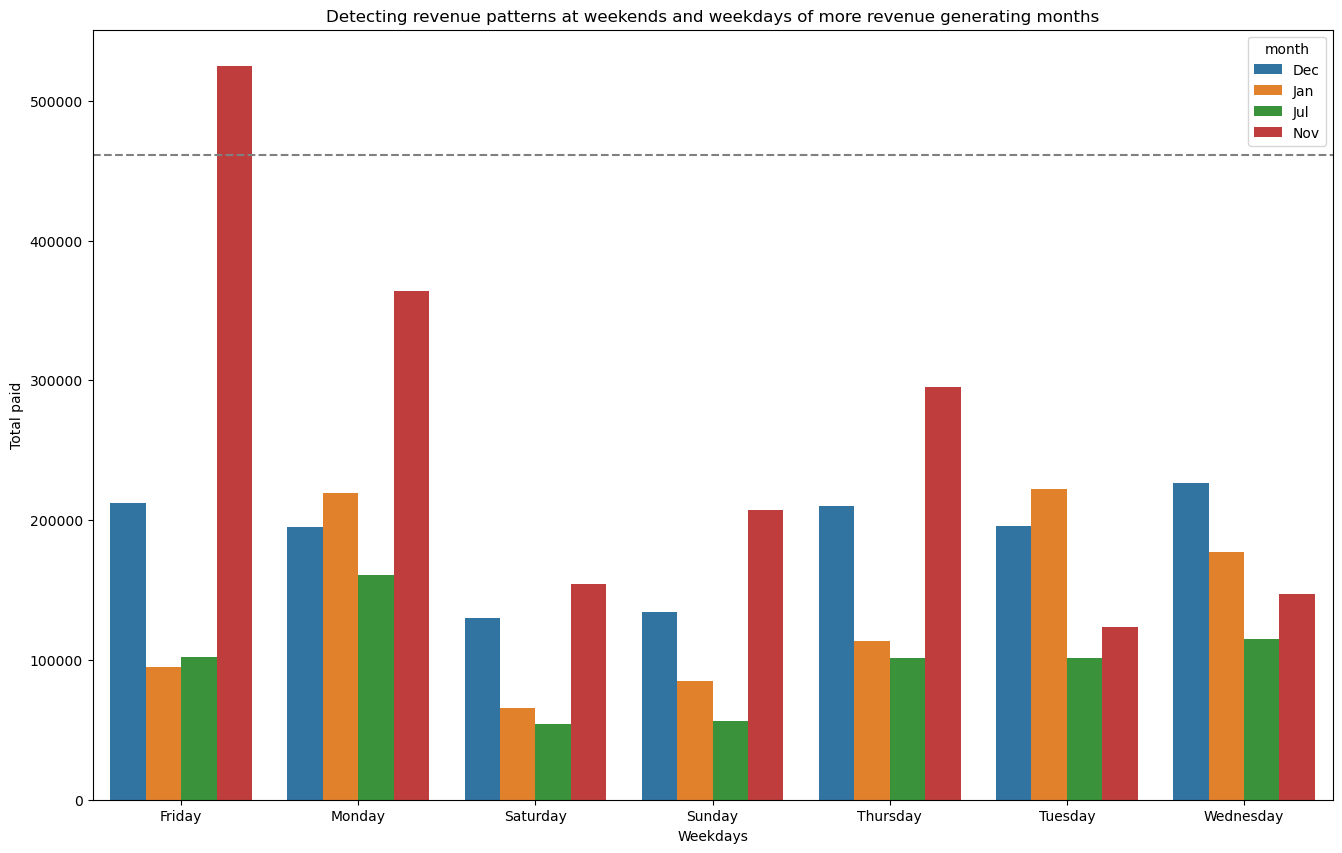

In [156]:
import matplotlib.pyplot as plt

# Create a list with the months sorted from January to December
# It is going to help us sort our columns appropriately
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# define the size of the plot
# using matplotlib (plt), which operates together with seaborn
plt.subplots(figsize=(16, 10))

p = sns.barplot(
    data=orders_new_2, # dataframe we will use to look for the columns information
    x='day', # x values on our chart
    y='total_paid', # y values on our chart
    hue='month',
    ci = None # group color in our chart
    #order=months # order x columns
)

# add a horizontal reference line into the chart to know where the mean value will be
p.axhline(
    orders_new['total_paid'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)
plt.xlabel('Weekdays') # x label name
plt.ylabel('Total paid') 
plt.title('Detecting revenue patterns at weekends and weekdays of more revenue generating months') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() # show the plot

<AxesSubplot:xlabel='day', ylabel='total_paid'>

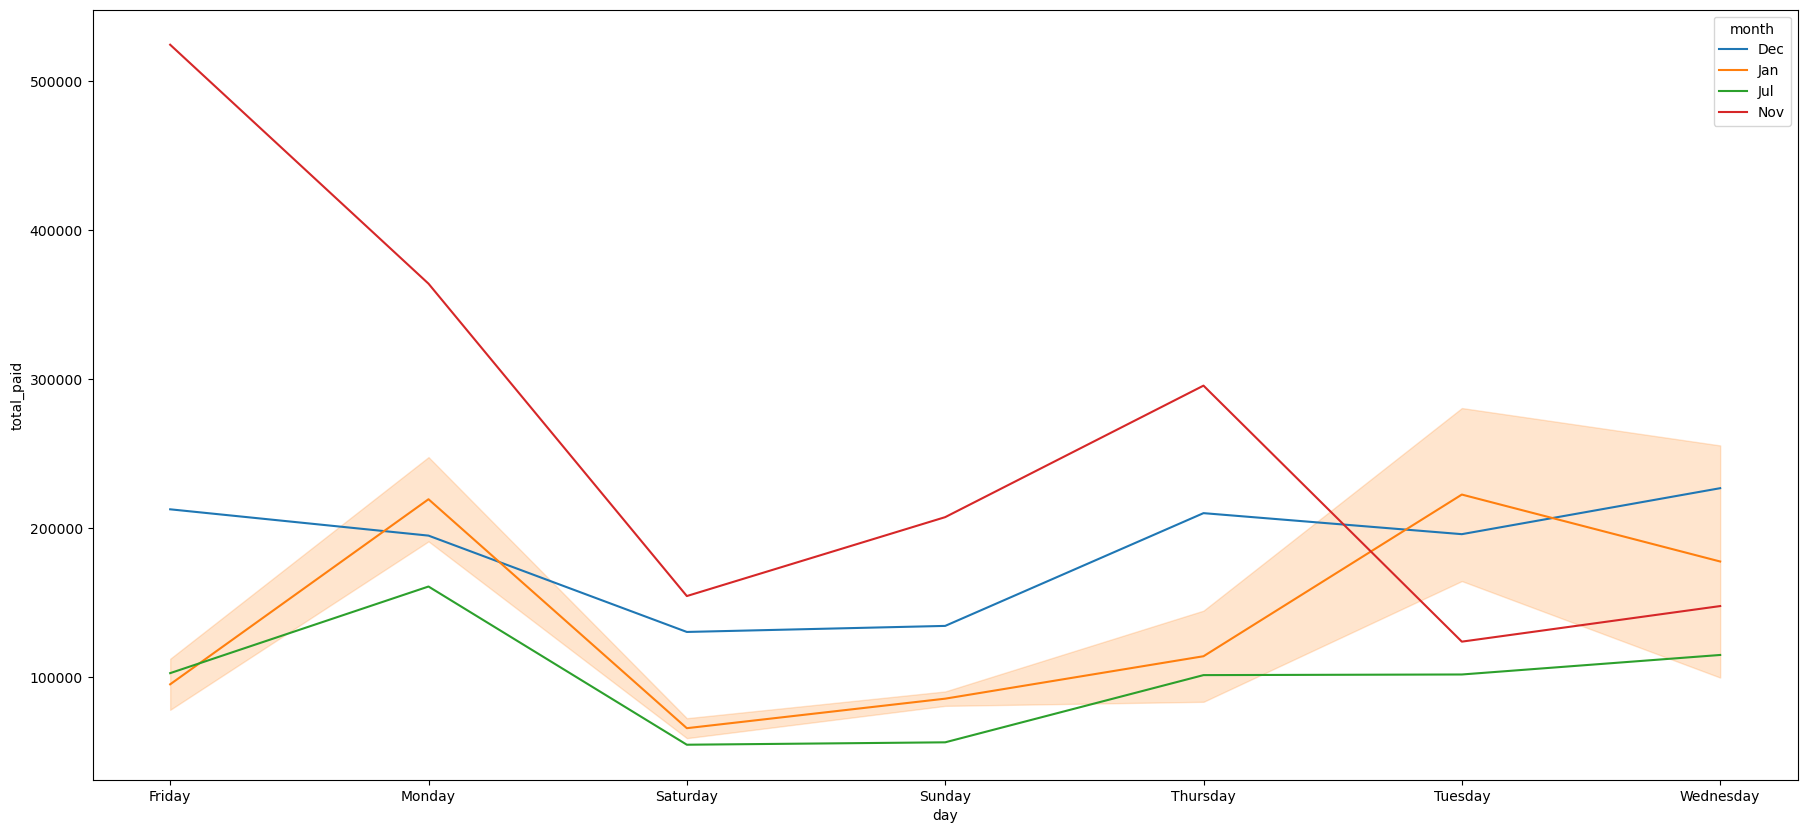

In [157]:
plt.subplots(figsize=(22, 10))
sns.lineplot(x= 'day', y = 'total_paid', data=orders_new_2, hue='month')

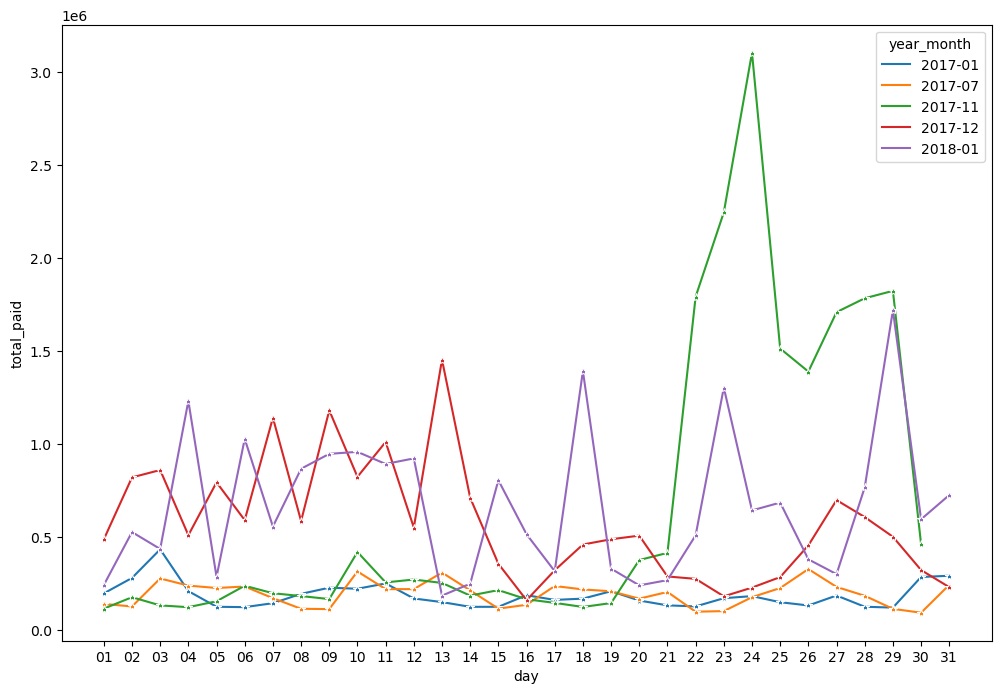

In [158]:
orders_new_2= (orders_compl.assign(
           year_month = orders['created_date'].dt.strftime('%Y-%m'),
           day = orders['created_date'].dt.strftime('%d'))
.query('year_month==["2017-01","2017-07","2017-11","2017-12","2018-01"]')
           .groupby(['year_month','day'])
    .agg({'total_paid':'sum'})
    
    .reset_index()
)

orders_new.head(10)
plt.subplots(figsize=(12, 8))

p=sns.lineplot(
    data= orders_new,
    x='day', 
    y='total_paid', 
    hue='year_month',marker='*')  
#orders_new.loc[orders_new.year_month=='2017-11']

## Revenue evolution in hours

In [159]:
orders_new_4 = orders_compl.assign(year = orders['created_date'].dt.strftime('%Y'), 
           month = orders_compl['created_date'].dt.strftime('%b'),
           day = orders_compl['created_date'].dt.strftime('%A'))


In [160]:
orders_new_4['hour'] = orders_new_4['created_date'].dt.hour



In [161]:
orders_new_4 = orders_new_4.assign(year_month = orders['created_date'].dt.strftime('%Y-%m'),
           day = orders['created_date'].dt.strftime('%d'))


In [162]:
orders_new_4 = (orders_new_4.query('year_month==["2017-01","2017-07","2017-11","2017-12","2018-01"]')
           .groupby(['year_month','hour'])
    .agg({'total_paid':'sum'})
    .reset_index()
)
orders_new_4

,year_month,hour,total_paid
0,2017-01,0,30892.47
1,2017-01,1,12189.19
2,2017-01,2,5204.87
3,2017-01,3,5956.90
4,2017-01,4,1618.27
5,2017-01,5,1677.13
6,2017-01,6,2812.65
7,2017-01,7,5659.75
8,2017-01,8,15947.06
9,2017-01,9,31699.62


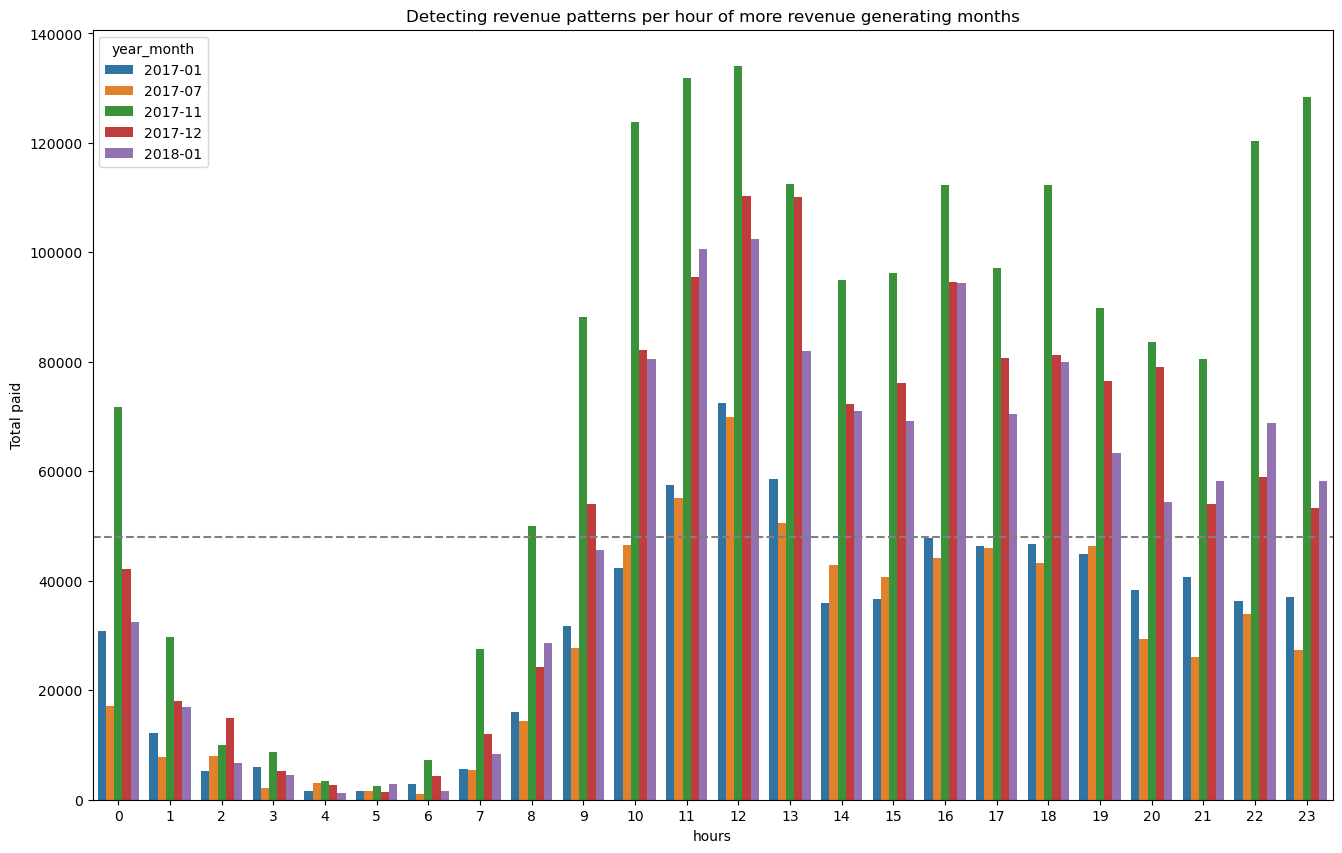

In [163]:
#Detecting revenue pattern per hour of more  revenue generating months. Not to show in presentation
import matplotlib.pyplot as plt

# Create a list with the months sorted from January to December
# It is going to help us sort our columns appropriately
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# define the size of the plot
# using matplotlib (plt), which operates together with seaborn
plt.subplots(figsize=(16, 10))

p = sns.barplot(
    data=orders_new_4, # dataframe we will use to look for the columns information
    x='hour', # x values on our chart
    y='total_paid', # y values on our chart
    hue='year_month',
    ci = None # group color in our chart
    #order=months # order x columns
)

# add a horizontal reference line into the chart to know where the mean value will be
p.axhline(
    orders_new_4['total_paid'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)
plt.xlabel('hours') # x label name
plt.ylabel('Total paid') 
plt.title('Detecting revenue patterns per hour of more revenue generating months') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() # show the plot

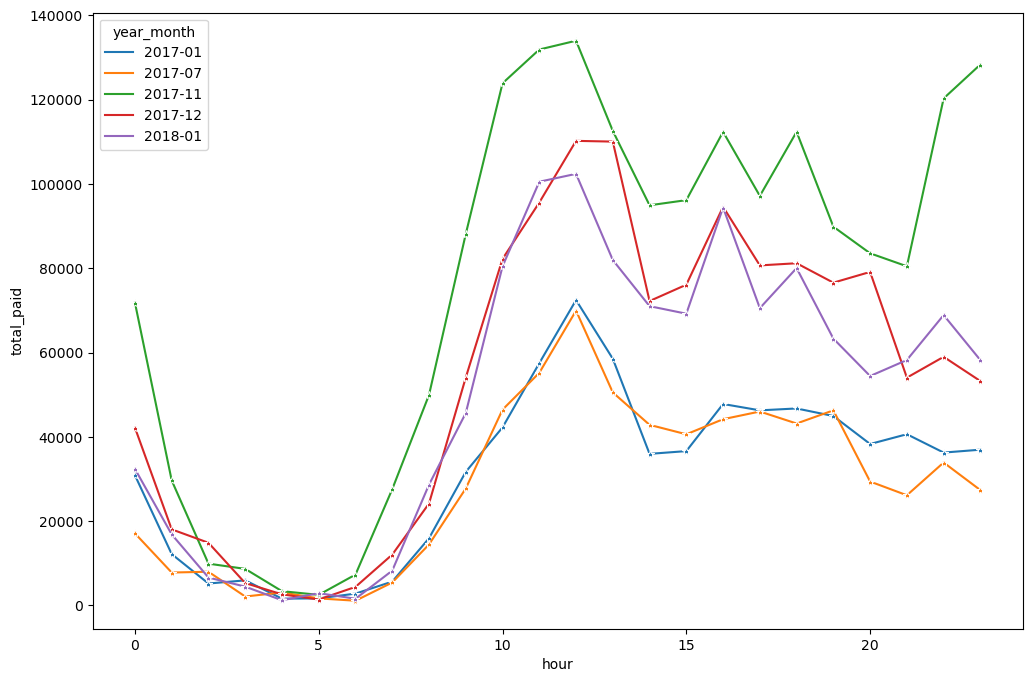

In [164]:
# Detecting revenue pattern per hour of more revenue generating months
plt.subplots(figsize=(12, 8))

p=sns.lineplot(
    data= orders_new_4,
    x='hour', 
    y='total_paid', 
    hue='year_month',marker='*')  
#orders_new.loc[orders_new.year_month=='2017-11']

ValueError: Could not interpret input 'month'

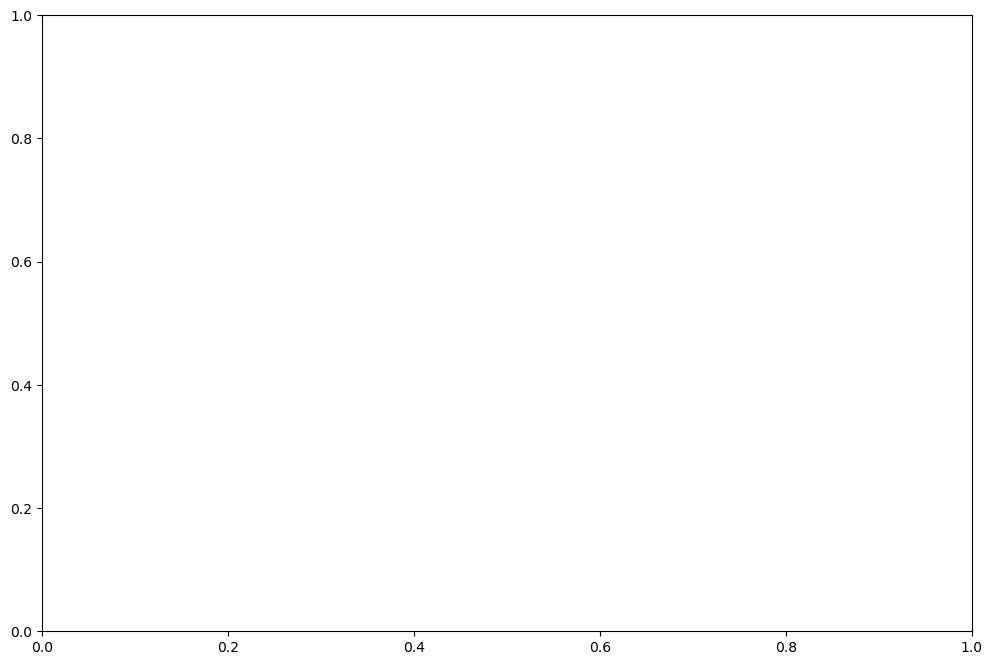

In [165]:
import matplotlib.pyplot as plt

# Create a list with the months sorted from January to December
# It is going to help us sort our columns appropriately
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# define the size of the plot
# using matplotlib (plt), which operates together with seaborn
plt.subplots(figsize=(12, 8))
p = sns.barplot(
    data= orders_new, # dataframe we will use to look for the columns information
    x='day', # x values on our chart
    y='total_paid', # y values on our chart
    hue='month') # group color in our chart
     # order x columns
    
    

# Discount and Revenue

##Plot of revenue and discount percent

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
disc_df=(
orderlines2
    .filter(["id_order","sku","unit_price",'product_quantity'])
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .merge(orders2.filter(['order_id','total_paid']), how='left',left_on='id_order',right_on='order_id')
    .dropna()
)
#disc_df.head()
plt.subplots(figsize=(15, 10))

p=sns.lineplot(x='disc_perc', y='total_paid',data=disc_df)
plt.xlabel('Discount_Percent') 
plt.ylabel('Revenue') 
plt.title('How revenue evolution with discount') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

###Plot discount status on revenue over time: 

In [ ]:
discount_rami_2 = (
orderlines2
    .filter(["id_order","sku","unit_price", 'date', 'total_price'])
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .assign(year_month=orderlines2.date.dt.strftime('%Y-%m'))
    .dropna()
    .copy()
)


import matplotlib.pyplot as plt
import seaborn as sns

discount_rami_2['discount_status'] = discount_rami_2.apply(lambda row: 'True' if row['disc'] == 0 else False, axis = 1)
discount_rami_2.info()

discount_rami_plot = discount_rami_2.groupby(['year_month', 'discount_status']).agg({'total_price':'sum'})
discount_rami_plot

In [ ]:
discount_rami_2.groupby('discount_status')['sku'].count()

In [ ]:
plt.subplots(figsize=(22, 10))
sns.lineplot(x= 'year_month', y = 'total_price', data=discount_rami_plot, hue='discount_status')

### Gouying plot on discount and revenue

----**From Guoying Dai**

I put my result of the revenue and discount relationship.

the first one the revenue come from the orders dataset, the column of --total paid.
in the the second one, the revenue is caculated by 'unit_price'*"product_quantity'

then I got the difference plot. I do not know why. Maybe we could discuss it on Monday.

In [ ]:
disc_analyse=(
orderlines2
    .filter(["id_order","sku","unit_price",'product_quantity','date'])
    .assign(year_month=orderlines2.date.dt.strftime('%Y-%m'))
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .merge(orders2.filter(['order_id','total_paid']), how='left',left_on='id_order',right_on='order_id')
    .dropna()
    ) 

disc_analyse["check_disc"]=disc_analyse.apply(lambda x: 'without_disc' if x['disc'] == 0.00 else 'with_discout',axis=1)
disc_analyse=(disc_analyse
              .groupby(['year_month','check_disc'])
              .agg({'total_paid':'sum'})
              .reset_index())

plt.subplots(figsize=(15,10))
p=sns.lineplot(x='year_month',y='total_paid',data=disc_analyse,hue='check_disc')

plt.xlabel('Time') 
plt.ylabel('Revenue') 
plt.title('How revenue evolution with or without discount') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()


In [ ]:
disc_analyse=(
orderlines2
    .filter(["id_order","sku","unit_price",'product_quantity','date'])
    .assign(year_month=orderlines2.date.dt.strftime('%Y-%m'))
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .assign(revenue= lambda x: x['unit_price']* x['product_quantity'])
    .dropna()
    ) 

disc_analyse["check_disc"]=disc_analyse.apply(lambda x: 'without_disc' if x['disc'] == 0.00 else 'with_discount',axis=1)
disc_analyse=(disc_analyse.groupby(['year_month','check_disc'])
    .agg({'revenue':'sum'})
    .reset_index())

plt.subplots(figsize=(20,10))

p=sns.lineplot(x='year_month',y='revenue',data=disc_analyse,hue='check_disc',marker='*')

plt.xlabel('Time') 
plt.ylabel('Revenue') 
plt.title('How Revenue evolution with or without discount') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

### Discount categories and revenue

In [ ]:
#Rene #do not delete
discount_rami_2 = (
orderlines2
    .filter(["id_order","sku","unit_price", 'date', 'total_price'])
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .assign(year_month=orderlines2.date.dt.strftime('%Y-%m'))
    .dropna()
    .groupby(['year_month', 'unit_price', 'disc', 'disc_perc'])
    .agg({'total_price':'sum'})
    .reset_index()
) 
discount_rami.tail(10)

In [ ]:
#rene 
def filter(x):
    if x == 0: 
      return "no discount"
    if (x > 0 and x <= 20):
        return '<=20%'
    if (x > 20 and x <= 40):
        return '21% - 40%'
    if (x > 40 and x <= 60):
        return '41% - 60%'
    if (x > 60 and x <= 80):
      return '61% - 80%'
    if(x > 80 and x <= 100):
      return '81% - 100%'
discount_rami_2['discount_category'] = discount_rami_2['disc_perc'].apply(filter).sort_values()
discount_rami_2

import numpy as np

discount_rami_2

In [ ]:
#rene #plot discount revenue
plt.subplots(figsize=(12, 12))
sns.lineplot(x= 'year_month', y = 'total_price', hue='discount_category', data=discount_rami_2, ci=None)
plt.ylim(0, 1500)

### What discount did the top 5 product category have?

In [ ]:

disc_quantity=(
orderlines2
    .filter(["id_order","sku","unit_price",'product_quantity','date'])
    .assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
    .merge(products.filter(["sku","desc","max_price_orderlines", "category"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .merge(orders2.filter(['order_id','total_paid']), how='left',left_on='id_order',right_on='order_id')
    .query('category==["other", "Mobile Phone", "External Memory", "Ipad and Accessories", "Cable Accessories"]')
    .groupby(['category', 'year_month', 'disc_perc'])
    .agg({'product_quantity':'count','total_paid':'sum'})
    .reset_index()
    .dropna()
    ) 
disc_quantity.head(10)

In [ ]:
plt.subplots(figsize=(20, 9))
sns.lineplot(x= 'year_month', y = 'disc_perc', data=disc_quantity, hue='category', ci=None)
plt.ylim(0, 50)

In [ ]:
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y = 'total_paid', data=disc_quantity, hue='category', ci=None)


###All categories and the discount they had

In [ ]:

disc_quantity_allcat=(
orderlines2
    .filter(["id_order","sku","unit_price",'product_quantity','date'])
    .assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
    .merge(products.filter(["sku","desc","max_price_orderlines", "category"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .merge(orders2.filter(['order_id','total_paid']), how='left',left_on='id_order',right_on='order_id')
    .groupby(['category', 'year_month', 'disc_perc'])
    .agg({'product_quantity':'count','total_paid':'sum'})
    .reset_index()
    .dropna()
    ) 
disc_quantity_allcat.head(10)

In [ ]:
plt.subplots(figsize=(20, 9))
sns.lineplot(x= 'year_month', y = 'disc_perc', data=disc_quantity_allcat, hue='category', ci=None)
plt.ylim(0, 110)

## Discount Categories and Revenue

In [ ]:
def filter(x):
    if x == 0: 
      return "no discount"
    if (x > 0 and x <= 20):
        return '<=20%'
    if (x > 20 and x <= 40):
        return '21% - 40%'
    if (x > 40 and x <= 60):
        return '41% - 60%'
    if (x > 60 and x <= 80):
      return '61% - 80%'
    if(x > 80 and x <= 100):
      return '81% - 100%'

In [ ]:
discount_rami_4 = (
orderlines2
    .filter(["id_order","sku","unit_price", 'date', 'total_price'])
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
    .dropna()
    .reset_index()
) 

In [ ]:
discount_rami_4['discount_category'] = discount_rami_4['disc_perc'].apply(filter).sort_values()

In [ ]:
plt.subplots(figsize=(22, 10))
sns.boxplot(x= 'discount_category', y = 'total_price', data=discount_rami_4)

In [ ]:
discount_rami_3 = (
orderlines2
    .filter(["id_order","sku","unit_price", 'date', 'total_price'])
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
    .dropna()
    .groupby(['year_month', 'unit_price', 'disc', 'disc_perc'])
    .agg({'total_price':'mean'})
    .reset_index()
) 

In [ ]:
discount_rami_3['discount_category'] = discount_rami_3['disc_perc'].apply(filter).sort_values() 

In [ ]:
plt.subplots(figsize=(22, 10))
sns.lineplot(x= 'year_month', y = 'average_price', hue='discount_category', ci=None, data=discount_rami_3)
plt.ylim(0, 400)

# Evolution of Sales in quarters

### Using order csv seasons

In [ ]:
#How sales evolution in seasons with outliers on orders
from pandas._libs import index
import matplotlib.pyplot as plt
import seaborn as sns
orders2['created_date'] = pd.to_datetime(orders2['created_date'])
orderlines2['date'] = pd.to_datetime(orderlines2['date'])

orders2['created_date']=orders2['created_date'].dt.strftime('%Y-%m')

orders2['seasons']=orders2['created_date'].map({'2017-03':'2017-spring','2017-04':'2017-spring','2017-05':'2017-spring'
,'2017-06':'2017-summer','2017-07':'2017-summer','2017-08':'2017-summer',
'2017-09':'2017-autumn','2017-10':'2017-autumn','2017-11':'2017-autumn'
,'2017-12':'2017-winter','2018-01':'2017-winter','2018-02':'2017-winter'})
sort_list=['2017-spring','2017-summer','2017-autumn','2017-winter']

orders_month=(orders2
              .query('state=="Completed"')
              .groupby('seasons')
              .agg({'total_paid':'sum'})
              .reset_index())

sort_list=['2017-spring','2017-summer','2017-autumn','2017-winter']
orders_month.index=orders_month['seasons']
orders_month=orders_month.loc[sort_list]

#sns.barplot(data=orders_month,x='month',y='order_id',hue='state',palette='colorblind')
p=sns.lineplot(data=orders_month,x='seasons',y='total_paid',marker='*')
p.axhline(
    orders_month['total_paid'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('sonsons-time') 
plt.ylabel('Revenue') 
plt.title('How sales evolution in quarters') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()


In [ ]:
#How sales evolution in seasons
from pandas._libs import index
import matplotlib.pyplot as plt
import seaborn as sns
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

orders['created_date']=orders['created_date'].dt.strftime('%Y-%m')

orders['seasons']=orders['created_date'].map({'2017-03':'2017-spring','2017-04':'2017-spring','2017-05':'2017-spring'
,'2017-06':'2017-summer','2017-07':'2017-summer','2017-08':'2017-summer',
'2017-09':'2017-autumn','2017-10':'2017-autumn','2017-11':'2017-autumn'
,'2017-12':'2017-winter','2018-01':'2017-winter','2018-02':'2017-winter'})
sort_list=['2017-spring','2017-summer','2017-autumn','2017-winter']

orders_month=(orders
              .query('state=="Completed"')
              .groupby('seasons')
              .agg({'total_paid':'sum'})
              .reset_index())

sort_list=['2017-spring','2017-summer','2017-autumn','2017-winter']
orders_month.index=orders_month['seasons']
orders_month=orders_month.loc[sort_list]

#sns.barplot(data=orders_month,x='month',y='order_id',hue='state',palette='colorblind')
p=sns.lineplot(data=orders_month,x='seasons',y='total_paid',marker='*')
p.axhline(
    orders_month['total_paid'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('sonsons-time') 
plt.ylabel('Revenue') 
plt.title('How sales evolution in quarters') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()


### Using order csv quarters

In [ ]:
#How sales evolution in quarters
import matplotlib.pyplot as plt
import seaborn as sns
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

orders['quarters']=pd.qcut(orders['created_date'],q=5, labels=('2017-Q1','2017-Q2','2017-Q3','2017-Q4','2018-Q1'))

orders_month=(orders
              .query('state=="Completed"')
              .groupby('quarters')
              .agg({'total_paid':'sum'})
              .reset_index())

#sns.barplot(data=orders_month,x='month',y='order_id',hue='state',palette='colorblind')
p=sns.lineplot(data=orders_month,x='quarters',y='total_paid',marker='*')
p.axhline(
    orders_month['total_paid'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('quarters-time') 
plt.ylabel('Revenue') 
plt.title('How sales evolution in quarters') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

In [ ]:
#How sales evolution in quarters without outliers on orders
import matplotlib.pyplot as plt
import seaborn as sns
orders2['created_date'] = pd.to_datetime(orders2['created_date'])
orderlines2['date'] = pd.to_datetime(orderlines2['date'])

orders2['quarters']=pd.qcut(orders2['created_date'],q=5, labels=('2017-Q1','2017-Q2','2017-Q3','2017-Q4','2018-Q1'))

orders_month=(orders2
              .query('state=="Completed"')
              .groupby('quarters')
              .agg({'total_paid':'sum'})
              .reset_index())

#sns.barplot(data=orders_month,x='month',y='order_id',hue='state',palette='colorblind')
p=sns.lineplot(data=orders_month,x='quarters',y='total_paid',marker='*')
p.axhline(
    orders_month['total_paid'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('quarters-time') 
plt.ylabel('Revenue') 
plt.title('How sales evolution in quarters') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

##Revenue and discount with and without analysis

In [ ]:
from pandas._libs import index
import matplotlib.pyplot as plt
import seaborn as sns
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

disc_df=(
orderlines
    .filter(["id_order","sku","unit_price",'product_quantity','date'])
    .assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .assign(revenue= lambda x: x['unit_price']* x['product_quantity'])
    .dropna())


Q1=disc_df.disc.quantile(0.25)#Q1 of disc
Q3=disc_df.disc.quantile(0.75) #Q1 of disc
IQR=Q3-Q1

Q1_r=disc_df.revenue.quantile(0.25)#Q1 of revenue
Q3_r=disc_df.revenue.quantile(0.75) #Q3 of revenue
IQR_r=Q3_r-Q1_r

filter=disc_df.loc[(disc_df['disc'] >= (Q1 - 1.5*IQR)) & (disc_df['disc'] <= (Q3 + 1.5*IQR))]
                                                          
filter=disc_df.loc[(disc_df['revenue'] >= (Q1_r - 1.5*IQR_r))&(disc_df['revenue'] <= (Q3_r + 1.5*IQR_r))]



filter["check_disc"]=filter.apply(lambda x: 'without_disc' if x['disc'] == 0.00 else 'with_discout',axis=1)

filter=(filter.groupby(['year_month','check_disc'])
    .agg({'revenue':'sum'})
    .reset_index())

plt.subplots(figsize=(15,10))

p=sns.lineplot(x='year_month', y='revenue',data=filter,hue='check_disc')

plt.xlabel('Time') 
plt.ylabel('Revenue') 
plt.title('How Revenue evolution with or without discount') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()
#print(Q1,Q3) 0,20
#print(Q1_r,Q3_r) 50.99 /879.0

## Revenue analysis without outliers

In [ ]:

from pandas._libs import index
import matplotlib.pyplot as plt
import seaborn as sns

orderlines2['date'] = pd.to_datetime(orderlines2['date'])

orderlines2['date'] = pd.to_datetime(orderlines2['date'])
orderlines2_month=(orderlines2
              .assign(year_month=orderlines2['date'].dt.strftime('%Y-%m'))
              .assign(total_paid=lambda x: x['unit_price']* x['product_quantity'])
              .groupby('year_month')
              .agg({'total_paid':'sum'})
              .reset_index())
sum_totalpaid=sum(orderlines2_month.total_paid)

orderlines2_month['total_paid_perc']=orderlines2_month.apply(lambda x: (x['total_paid']/128659393.77)*100, axis=1)

plt.subplots(figsize=(10,5))

p=sns.lineplot(data=orderlines2_month,x='year_month',y='total_paid_perc',marker='<')

p.axhline(
    orderlines2_month['total_paid_perc'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('Time') 
plt.ylabel('Total Paid Percent') 
plt.title('How revenue evolution through 2017 and 2018') 
plt.xticks(rotation=45)
plt.show()



### Revenue date of the month with new months after outliers removed

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines2['date'] = pd.to_datetime(orderlines2['date'])

orderlines2_new = (orderlines2
                  .assign(year_month = orderlines2['date'].dt.strftime('%Y-%m'), day = orderlines2['date'].dt.strftime('%d'))
                  .assign(total_paid=lambda x: x['unit_price']* x['product_quantity'])
                  .query('year_month==["2017-11","2017-12","2018-01"]')
                  .groupby(['year_month','day'])
                  .agg({'total_paid':'sum'})
                  .reset_index())

plt.subplots(figsize=(10, 5))

p=sns.lineplot(
    data= orderlines2_new,
    x='day', 
    y='total_paid', 
    hue='year_month',marker='*')  

plt.xlabel('Time-Day') 
plt.ylabel('Total Paid') 
plt.title('How revenue changed in the specified months') 
plt.show()

p.axhline(
    orderlines2_new['total_paid'].mean(),
    linestyle='--', 
    color='gray')


###Revenue and hour on the day to the top revenue months after outliers removed

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines2['date'] = pd.to_datetime(orderlines2['date'])

orderlines2_new = (orderlines2.assign(
           hour = orderlines2['date'].dt.strftime('%H'),
           The_Big_Day= orderlines2['date'].dt.strftime('%Y-%m-%d'))
          .assign(total_paid=lambda x: x['unit_price']* x['product_quantity'])
           .query('The_Big_Day==["2017-11-24"]')
           .groupby(['hour','The_Big_Day'])
           .agg({'total_paid':'sum'})
           .reset_index())

plt.subplots(figsize=(10, 5))

p=sns.lineplot(
    data= orderlines2_new,
    x='hour', 
    y='total_paid', hue='The_Big_Day')

plt.xlabel('Time-Hours') 
plt.ylabel('Revenue') 
plt.title('Revenue in one specified day') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

## Evolution on quarters without outliers using orderlines csv

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines2['date'] = pd.to_datetime(orderlines2['date'])

orderlines2['quarters']=pd.qcut(orderlines2['date'],q=5, labels=('2017-Q1','2017-Q2','2017-Q3','2017-Q4','2018-Q1'))

orderlines2_month=(orderlines2
              . assign(total_paid=lambda x: x['unit_price']* x['product_quantity'])
              .groupby('quarters')
              .agg({'total_paid':'sum'})
              .reset_index())

#sns.barplot(data=orders_month,x='month',y='order_id',hue='state',palette='colorblind')
p=sns.lineplot(data=orderlines2_month,x='quarters',y='total_paid',marker='*')
p.axhline(
    orderlines2_month['total_paid'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('quarters-time') 
plt.ylabel('Revenue') 
plt.title('How sales evolution in different quarters') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

## Evolution on seasons without outliers using orderlines csv

In [ ]:
from pandas._libs import index
import matplotlib.pyplot as plt
import seaborn as sns
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines2['date'] = pd.to_datetime(orderlines2['date'])

orderlines2['date']=orderlines2['date'].dt.strftime('%Y-%m')

orderlines2['seasons']=orderlines2['date'].map({'2017-03':'2017-spring','2017-04':'2017-spring','2017-05':'2017-spring'
,'2017-06':'2017-summer','2017-07':'2017-summer','2017-08':'2017-summer',
'2017-09':'2017-autumn','2017-10':'2017-autumn','2017-11':'2017-autumn'
,'2017-12':'2017-winter','2018-01':'2017-winter','2018-02':'2017-winter'})
sort_list=['2017-spring','2017-summer','2017-autumn','2017-winter']

orderlines2_month=(orderlines2
              . assign(total_paid=lambda x: x['unit_price']* x['product_quantity'])
              .groupby('seasons')
              .agg({'total_paid':'sum'})
              .reset_index())

sort_list=['2017-spring','2017-summer','2017-autumn','2017-winter']
orderlines2_month.index=orderlines2_month['seasons']
orderlines2_month=orderlines2_month.loc[sort_list]

#sns.barplot(data=orders_month,x='month',y='order_id',hue='state',palette='colorblind')
p=sns.lineplot(data=orderlines2_month,x='seasons',y='total_paid',marker='*')
p.axhline(
    orderlines2_month['total_paid'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('seasons-time') 
plt.ylabel('Revenue') 
plt.title('How sales evolution in different seasons') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()
